In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting Google drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/NIFTY 50.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8140 non-null   object 
 1   Date        8140 non-null   object 
 2   Open        7015 non-null   float64
 3   High        7015 non-null   float64
 4   Low         7015 non-null   float64
 5   Close       8140 non-null   float64
dtypes: float64(4), object(2)
memory usage: 381.7+ KB


In [5]:
df.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,12 Jan 2024,21773.55,21928.25,21715.15,21894.55
1,NIFTY 50,11 Jan 2024,21688.00,21726.50,21593.75,21647.20
2,NIFTY 50,10 Jan 2024,21529.30,21641.85,21448.65,21618.70
3,NIFTY 50,09 Jan 2024,21653.60,21724.45,21517.85,21544.85
4,NIFTY 50,08 Jan 2024,21747.60,21763.95,21492.90,21513.00


In [6]:
df.tail()

,Index Name,Date,Open,High,Low,Close
8135,NIFTY 50,10 Jul 1990,NaN,NaN,NaN,288.69
8136,NIFTY 50,09 Jul 1990,NaN,NaN,NaN,289.69
8137,NIFTY 50,06 Jul 1990,NaN,NaN,NaN,289.04
8138,NIFTY 50,05 Jul 1990,NaN,NaN,NaN,284.04
8139,NIFTY 50,03 Jul 1990,NaN,NaN,NaN,279.02


### **Data Cleaning**

In [7]:
#Droping unncessesary columns
df = df.drop(columns=['Index Name'])

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d %b %Y")

# Sort in chronological order (earliest → latest)
df = df.sort_values(by="Date").reset_index(drop=True)

# Set Date as index
df = df.set_index("Date")

# Check
print(df.head())   #after this it Should now start in 1990
print(df.tail())   #after this it Should now end in 2024

#Checking missing values
missing_values = df.isnull().sum()
print('Missing_Values:', missing_values)


#Checking for duplicate indices
dup_indexes = df.index.duplicated().sum()
print('Duplicate_indices:',dup_indexes)

            Open  High  Low   Close
Date                               
1990-07-03   NaN   NaN  NaN  279.02
1990-07-05   NaN   NaN  NaN  284.04
1990-07-06   NaN   NaN  NaN  289.04
1990-07-09   NaN   NaN  NaN  289.69
1990-07-10   NaN   NaN  NaN  288.69
                Open      High       Low     Close
Date                                              
2024-01-08  21747.60  21763.95  21492.90  21513.00
2024-01-09  21653.60  21724.45  21517.85  21544.85
2024-01-10  21529.30  21641.85  21448.65  21618.70
2024-01-11  21688.00  21726.50  21593.75  21647.20
2024-01-12  21773.55  21928.25  21715.15  21894.55
Missing_Values: Open     1125
High     1125
Low      1125
Close       0
dtype: int64
Duplicate_indices: 0


In [8]:
#Adding previous open,close,high and low to the set
df['Prev_Open']  = df['Open'].shift(1)
df['Prev_High']  = df['High'].shift(1)
df['Prev_Low']   = df['Low'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)

#Reviewing the random head of the dataset
df.sample(n=5,random_state=42)

,Open,High,Low,Close,Prev_Open,Prev_High,Prev_Low,Prev_Close
Date,,,,,,,,
1994-05-24,NaN,NaN,NaN,1154.20,NaN,NaN,NaN,1165.50
2007-10-11,5438.90,5532.75,5424.25,5524.80,5328.15,5454.70,5328.15,5441.40
1996-01-11,862.62,873.72,861.97,873.27,863.86,869.01,863.80,863.80
1994-09-05,NaN,NaN,NaN,1353.50,NaN,NaN,NaN,1359.00
1996-01-17,866.00,866.00,857.11,857.11,871.29,871.29,866.64,868.52


### **Exploratory Data Analysis**

In [9]:
#Statistical Summary table
basic_stats = df.describe(include='all')
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

missing_values = df.isnull().sum()

Dist_stats =pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis, 'Missing Values': missing_values}).T

stats_table =pd.concat([basic_stats, Dist_stats], axis=0)
stats_table

,Open,High,Low,Close,Prev_Open,Prev_High,Prev_Low,Prev_Close
count,7015.000000,7015.000000,7015.000000,8140.000000,7014.000000,7014.000000,7014.000000,8139.000000
mean,6059.632078,6096.444047,6014.429252,5333.749515,6057.391714,6094.186875,6012.190768,5331.714768
std,5185.154063,5203.194211,5157.121331,5138.481470,5182.127113,5200.129338,5154.079643,5135.516628
min,786.370000,805.820000,775.430000,279.020000,786.370000,805.820000,775.430000,279.020000
25%,1376.225000,1392.250000,1363.850000,1108.725000,1376.087500,1392.200000,1363.650000,1108.650000
50%,5025.350000,5071.350000,4977.100000,3859.850000,5024.125000,5069.875000,4977.100000,3858.700000
75%,8749.175000,8787.300000,8694.050000,8186.775000,8748.137500,8786.912500,8690.275000,8184.100000
max,21773.550000,21928.250000,21715.150000,21894.550000,21751.350000,21834.350000,21680.850000,21778.700000
Skewness,1.040281,1.037747,1.043497,1.197280,1.039574,1.037009,1.042766,1.196569
Kurtosis,0.231126,0.226874,0.239417,0.587096,0.228879,0.224492,0.237059,0.584430


### **Data Visualization**

In [10]:
#Candlestick plot of daily trends
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.update_layout(title="Daily Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()


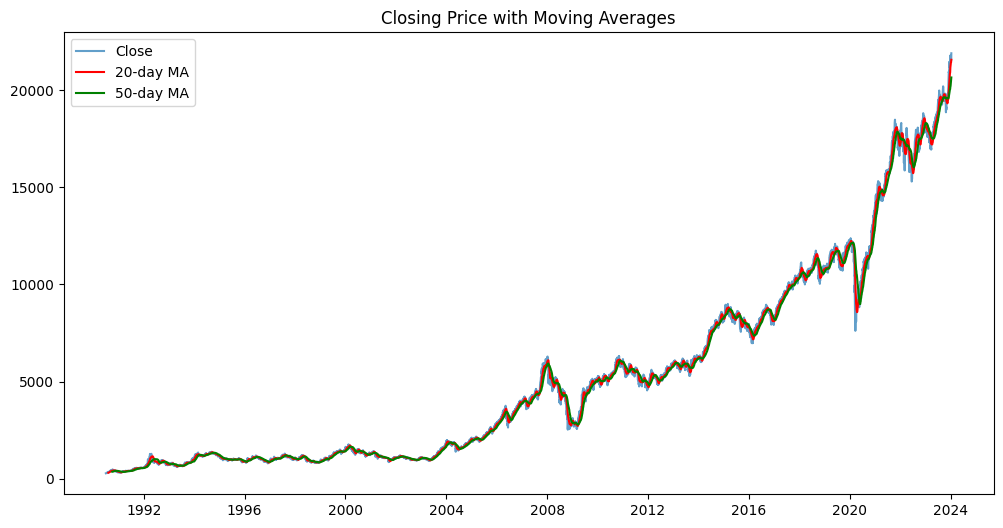

In [11]:
#Moving average of 20 days and 50 days to understand short and long term trends
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close', alpha=0.7)
plt.plot(df['MA20'], label='20-day MA', color='red')
plt.plot(df['MA50'], label='50-day MA', color='green')
plt.title("Closing Price with Moving Averages")
plt.legend()
plt.show()

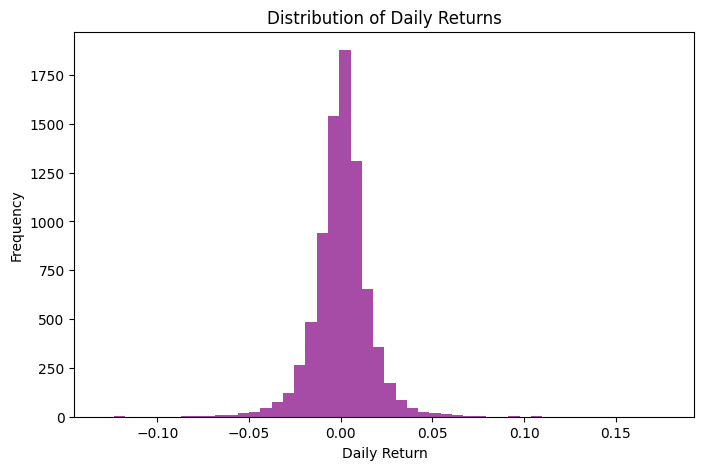

In [12]:
#Daily returns historam plot
df['Returns'] = df['Close'].pct_change()

plt.figure(figsize=(8,5))
plt.hist(df['Returns'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

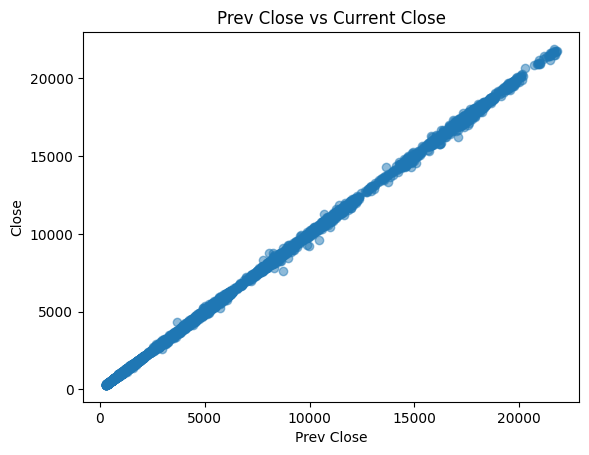

In [13]:
#Scatter plot of prev_close vs close
plt.scatter(df['Prev_Close'], df['Close'], alpha=0.5)
plt.title("Prev Close vs Current Close")
plt.xlabel("Prev Close")
plt.ylabel("Close")
plt.show()

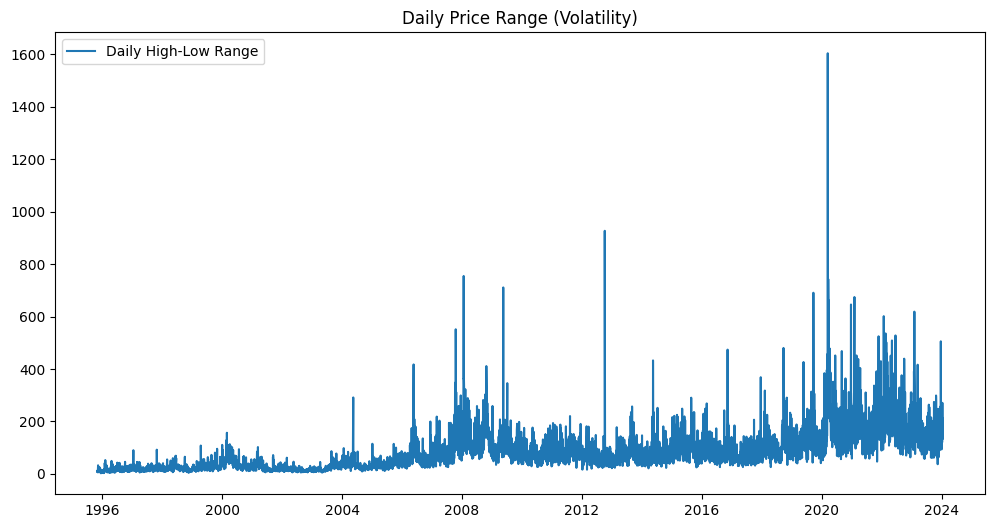

In [14]:
#High-Low Range (Volatility by Day)
df['Range'] = df['High'] - df['Low']
plt.figure(figsize=(12,6))
plt.plot(df['Range'], label='Daily High-Low Range')
plt.title("Daily Price Range (Volatility)")
plt.legend()
plt.show()

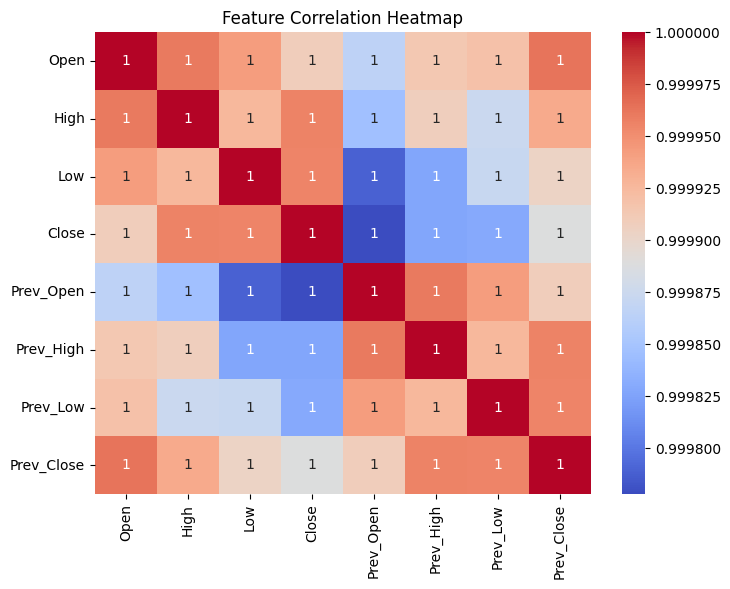

In [15]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Prev_Open','Prev_High','Prev_Low','Prev_Close']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


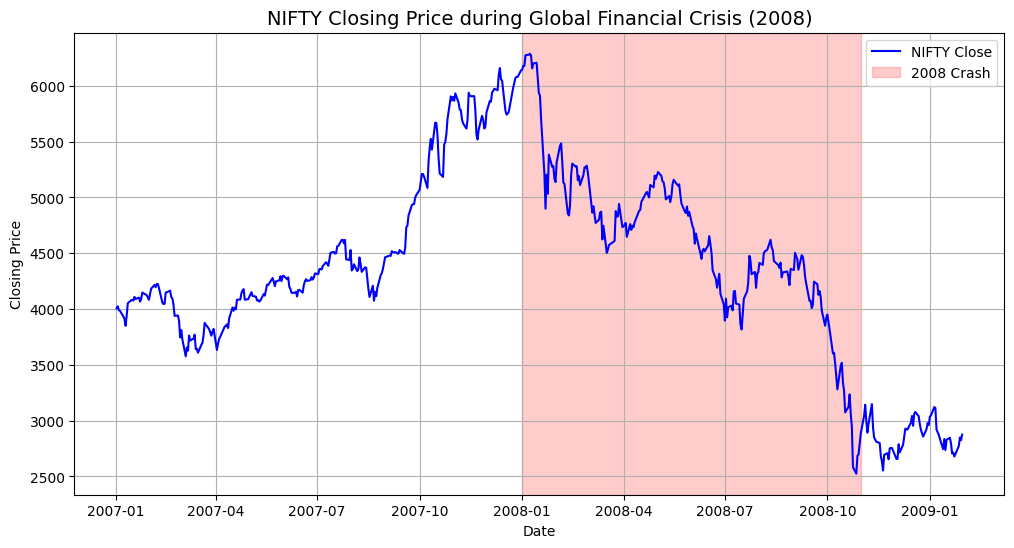

In [16]:
# Select period around 2008 crisis
crisis_period = df.loc["2007-01":"2009-01"]

# Line chart of Close with crash highlighted
plt.figure(figsize=(12,6))
plt.plot(crisis_period.index, crisis_period['Close'], label="NIFTY Close", color="blue")
plt.axvspan("2008-01-01", "2008-10-31", color="red", alpha=0.2, label="2008 Crash")
plt.title("NIFTY Closing Price during Global Financial Crisis (2008)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

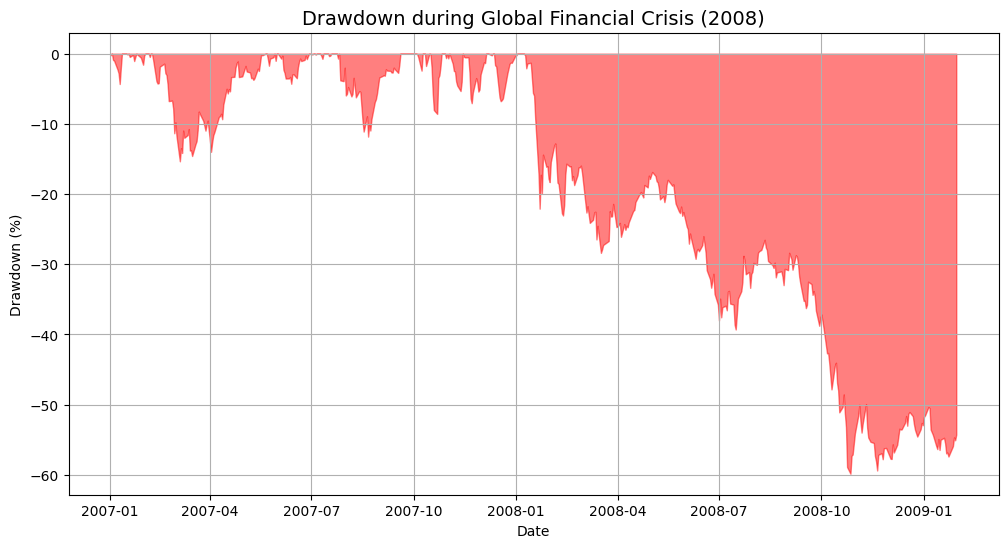

In [17]:
# Calculate rolling peak and drawdown
df['Peak'] = df['Close'].cummax()
df['Drawdown'] = (df['Close'] - df['Peak']) / df['Peak'] * 100

# Select same period
crisis_period = df.loc["2007-01":"2009-01"]

# Drawdown plot
plt.figure(figsize=(12,6))
plt.fill_between(crisis_period.index, crisis_period['Drawdown'], color="red", alpha=0.5)
plt.title("Drawdown during Global Financial Crisis (2008)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.show()

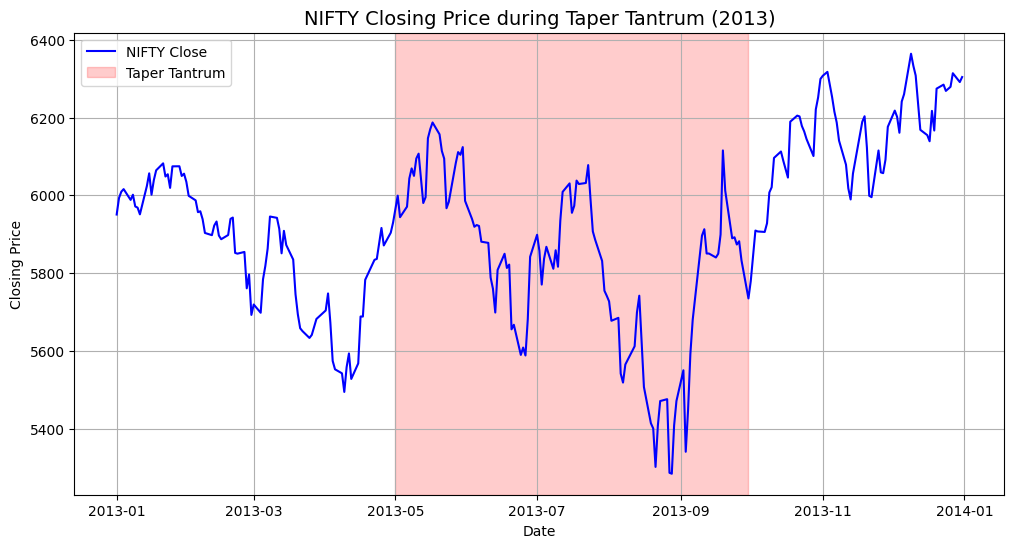

In [18]:
# Select period around Taper Tantrum
taper_period = df.loc["2013-01":"2013-12"]

plt.figure(figsize=(12,6))
plt.plot(taper_period.index, taper_period['Close'], label="NIFTY Close", color="blue")
plt.axvspan("2013-05-01", "2013-09-30", color="red", alpha=0.2, label="Taper Tantrum")
plt.title("NIFTY Closing Price during Taper Tantrum (2013)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


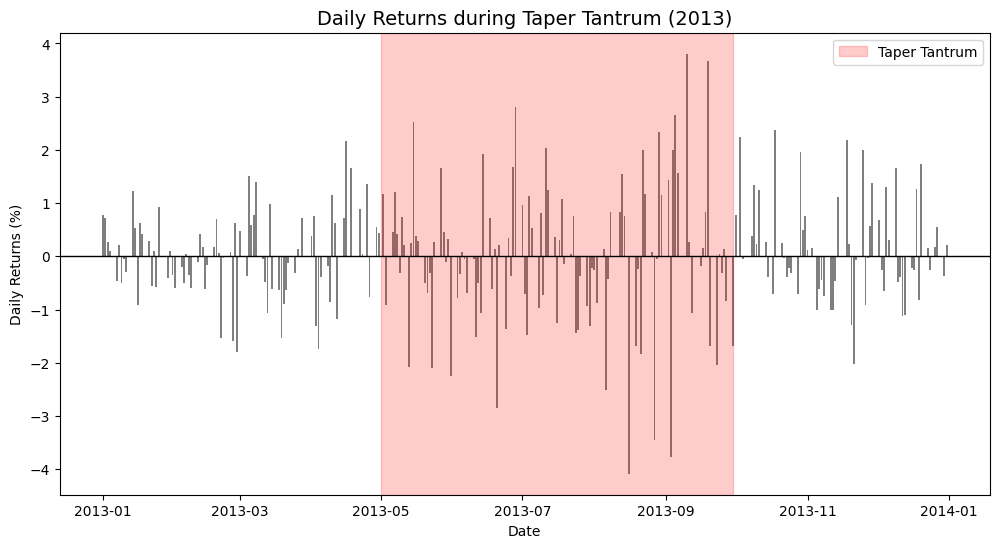

In [19]:
# Calculate daily returns (%)
df['Returns'] = df['Close'].pct_change() * 100

# Select taper tantrum period
taper_period = df.loc["2013-01":"2013-12"]

plt.figure(figsize=(12,6))
plt.bar(taper_period.index, taper_period['Returns'], color="gray")
plt.axvspan("2013-05-01", "2013-09-30", color="red", alpha=0.2, label="Taper Tantrum")
plt.axhline(0, color="black", linewidth=1)
plt.title("Daily Returns during Taper Tantrum (2013)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Returns (%)")
plt.legend()
plt.show()


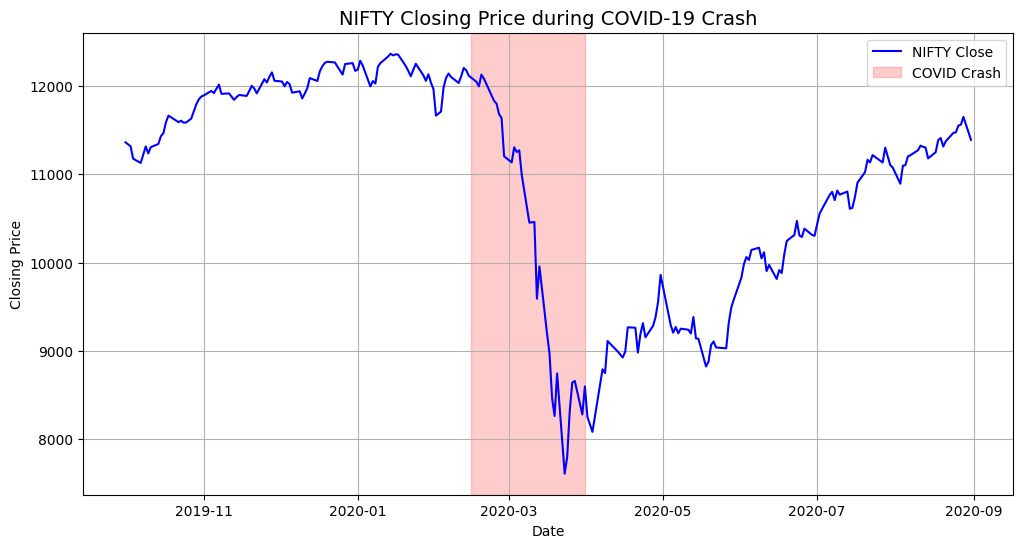

In [20]:
#NSE crash in COVID pandamic
crash_period = df.loc["2019-10":"2020-08"]

#Plot Closing Price with highlighted crash
plt.figure(figsize=(12,6))
plt.plot(crash_period.index, crash_period['Close'], label="NIFTY Close", color="blue")
plt.axvspan("2020-02-15", "2020-03-31", color="red", alpha=0.2, label="COVID Crash")
plt.title("NIFTY Closing Price during COVID-19 Crash", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

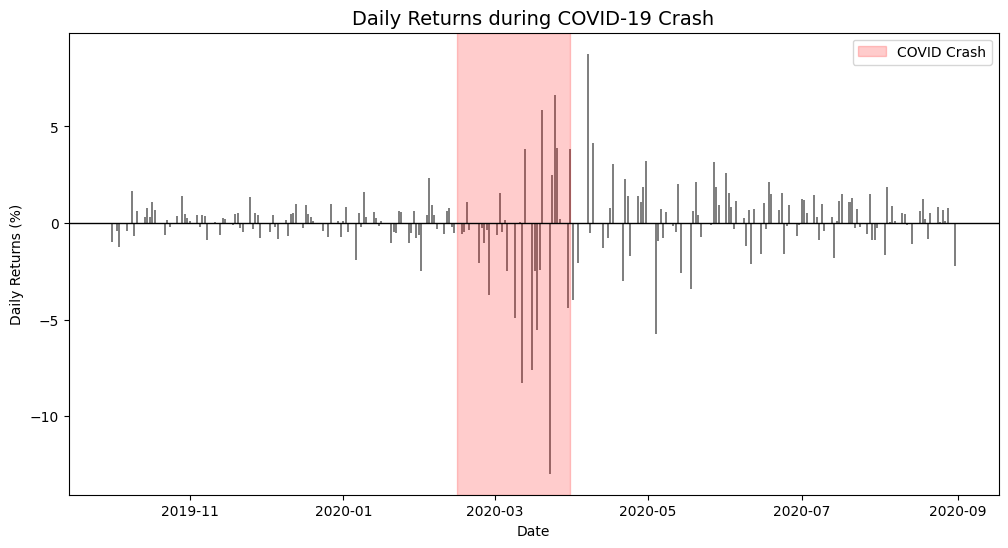

In [21]:
# Calculate daily returns (%)
df['Returns'] = df['Close'].pct_change() * 100

# Select same crash period
crash_period = df.loc["2019-10":"2020-08"]

# Plot daily returns
plt.figure(figsize=(12,6))
plt.bar(crash_period.index, crash_period['Returns'], color="gray")
plt.axvspan("2020-02-15", "2020-03-31", color="red", alpha=0.2, label="COVID Crash")
plt.axhline(0, color="black", linewidth=1)
plt.title("Daily Returns during COVID-19 Crash", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Returns (%)")
plt.legend()
plt.show()

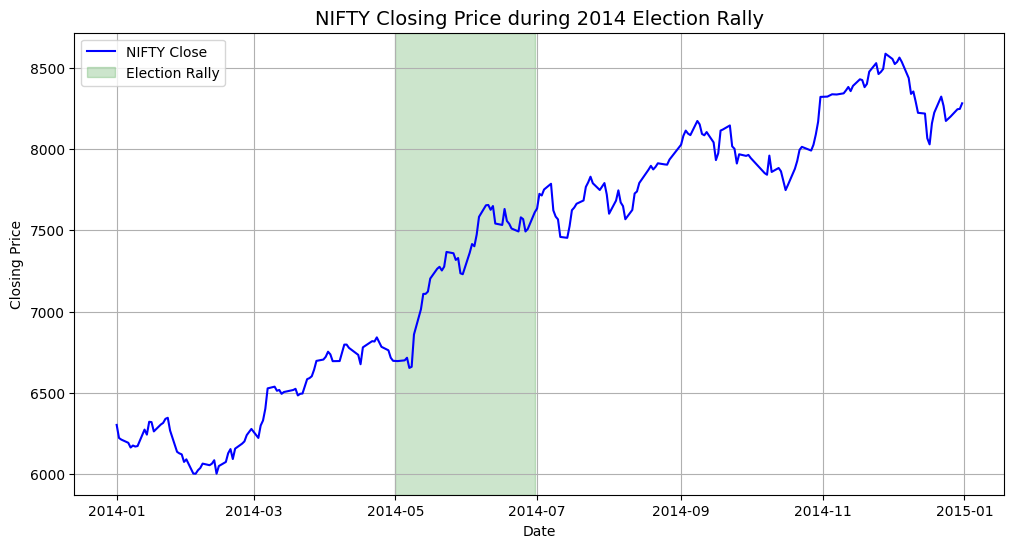

In [22]:
# Select 2014 period
election_period = df.loc["2014-01":"2014-12"]

plt.figure(figsize=(12,6))
plt.plot(election_period.index, election_period['Close'], label="NIFTY Close", color="blue")
plt.axvspan("2014-05-01", "2014-06-30", color="green", alpha=0.2, label="Election Rally")
plt.title("NIFTY Closing Price during 2014 Election Rally", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


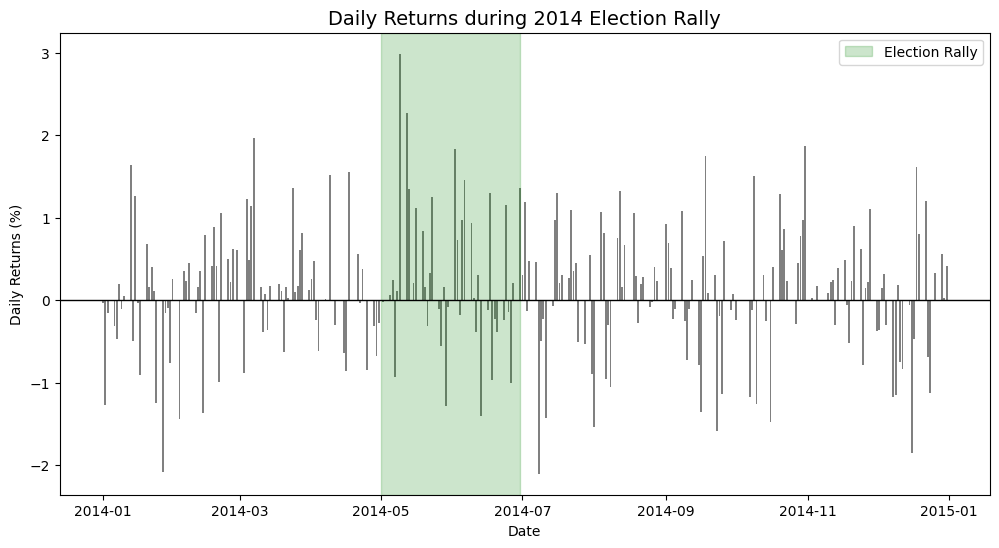

In [23]:
# Calculate daily returns (%)
df['Returns'] = df['Close'].pct_change() * 100

# Select 2014 period
election_period = df.loc["2014-01":"2014-12"]

plt.figure(figsize=(12,6))
plt.bar(election_period.index, election_period['Returns'], color="gray")
plt.axvspan("2014-05-01", "2014-06-30", color="green", alpha=0.2, label="Election Rally")
plt.axhline(0, color="black", linewidth=1)
plt.title("Daily Returns during 2014 Election Rally", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Returns (%)")
plt.legend()
plt.show()


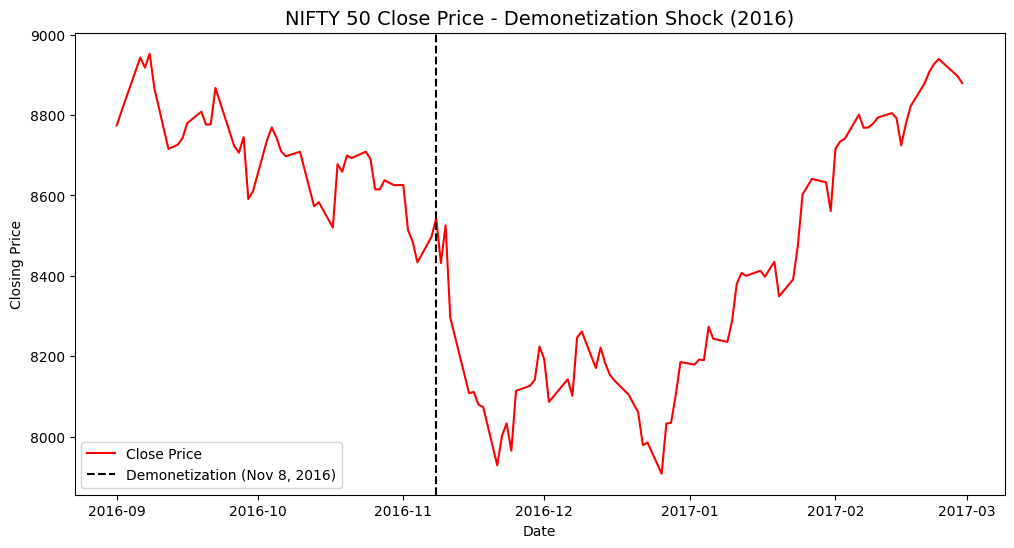

In [24]:
# Select period around Demonetization
demo_period = df.loc["2016-09":"2017-02"]

plt.figure(figsize=(12,6))
plt.plot(demo_period.index, demo_period['Close'], label="Close Price", color="red")
plt.axvline(pd.to_datetime("2016-11-08"), color="black", linestyle="--", label="Demonetization (Nov 8, 2016)")
plt.title("NIFTY 50 Close Price - Demonetization Shock (2016)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

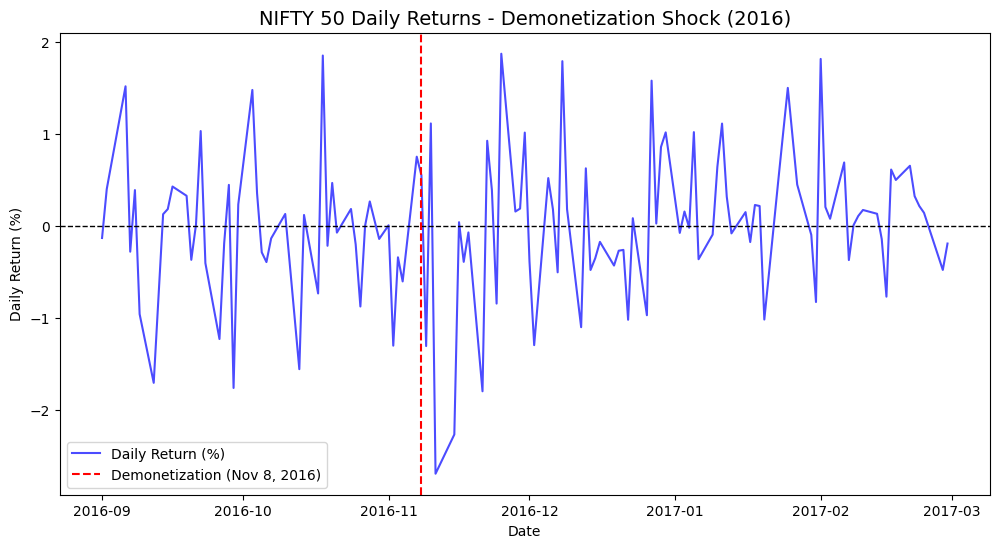

In [25]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100  # % returns

# Select period around Demonetization
demo_period = df.loc["2016-09":"2017-02"]

plt.figure(figsize=(12,6))
plt.plot(demo_period.index, demo_period['Daily_Return'], color="blue", alpha=0.7, label="Daily Return (%)")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(pd.to_datetime("2016-11-08"), color="red", linestyle="--", label="Demonetization (Nov 8, 2016)")
plt.title("NIFTY 50 Daily Returns - Demonetization Shock (2016)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

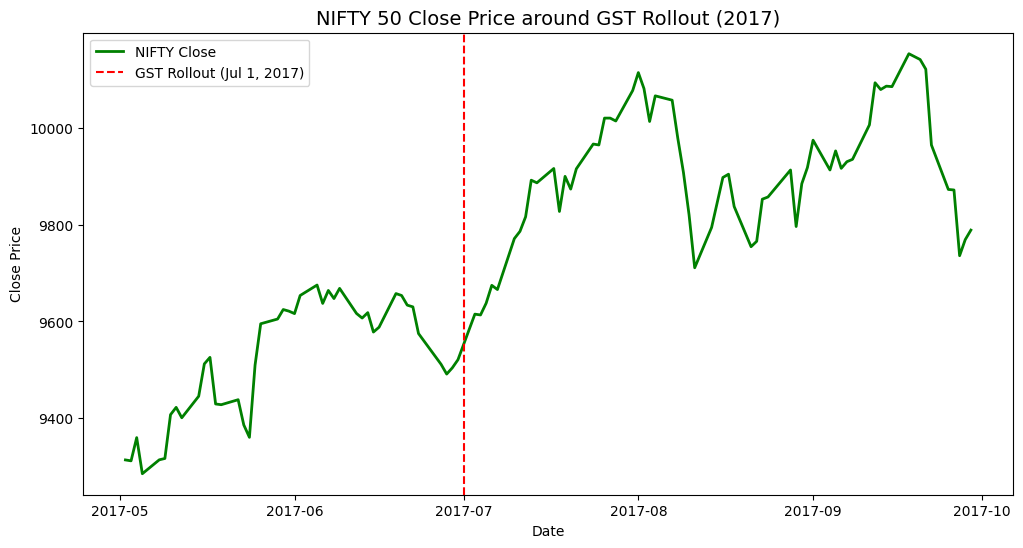

In [26]:
# Select GST rollout period
gst_period = df.loc["2017-05":"2017-09"]

plt.figure(figsize=(12,6))
plt.plot(gst_period.index, gst_period['Close'], color="green", linewidth=2, label="NIFTY Close")
plt.axvline(pd.to_datetime("2017-07-01"), color="red", linestyle="--", label="GST Rollout (Jul 1, 2017)")
plt.title("NIFTY 50 Close Price around GST Rollout (2017)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

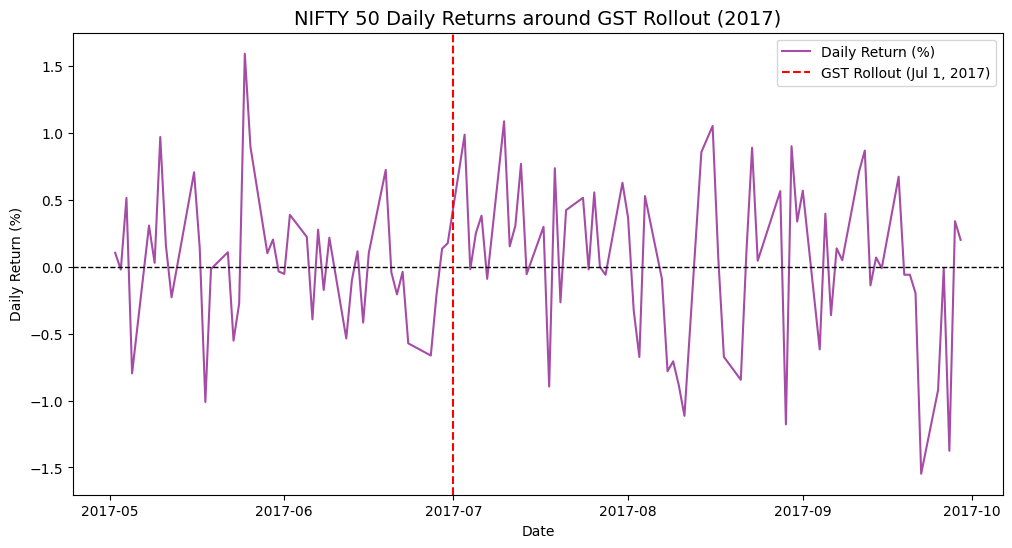

In [27]:
# Calculate daily returns if not already
df['Daily_Return'] = df['Close'].pct_change() * 100  # %

# Select GST rollout period
gst_period = df.loc["2017-05":"2017-09"]

plt.figure(figsize=(12,6))
plt.plot(gst_period.index, gst_period['Daily_Return'], color="purple", alpha=0.7, label="Daily Return (%)")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(pd.to_datetime("2017-07-01"), color="red", linestyle="--", label="GST Rollout (Jul 1, 2017)")
plt.title("NIFTY 50 Daily Returns around GST Rollout (2017)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

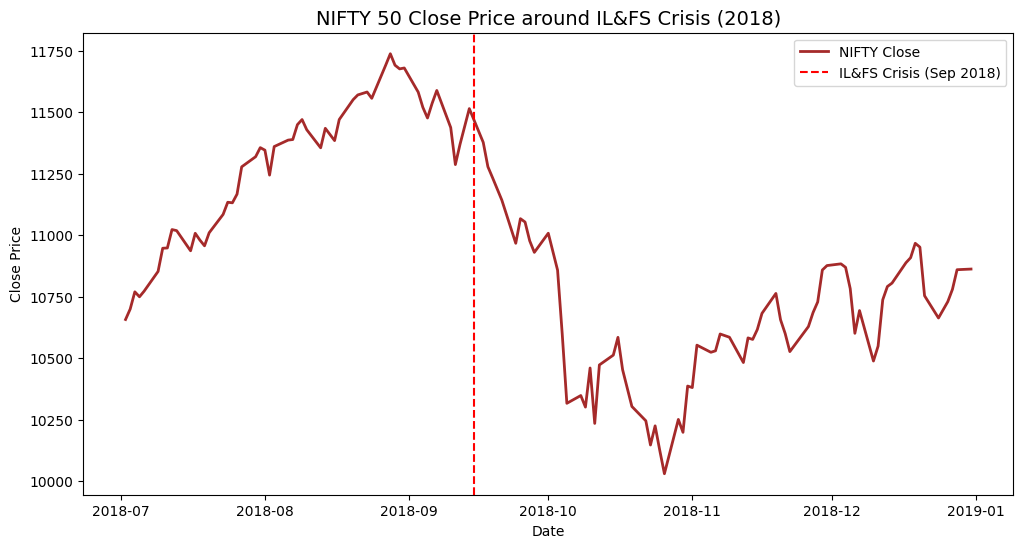

In [28]:
# Select IL&FS crisis period
ilfs_period = df.loc["2018-07":"2018-12"]

plt.figure(figsize=(12,6))
plt.plot(ilfs_period.index, ilfs_period['Close'], color="brown", linewidth=2, label="NIFTY Close")
plt.axvline(pd.to_datetime("2018-09-15"), color="red", linestyle="--", label="IL&FS Crisis (Sep 2018)")
plt.title("NIFTY 50 Close Price around IL&FS Crisis (2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

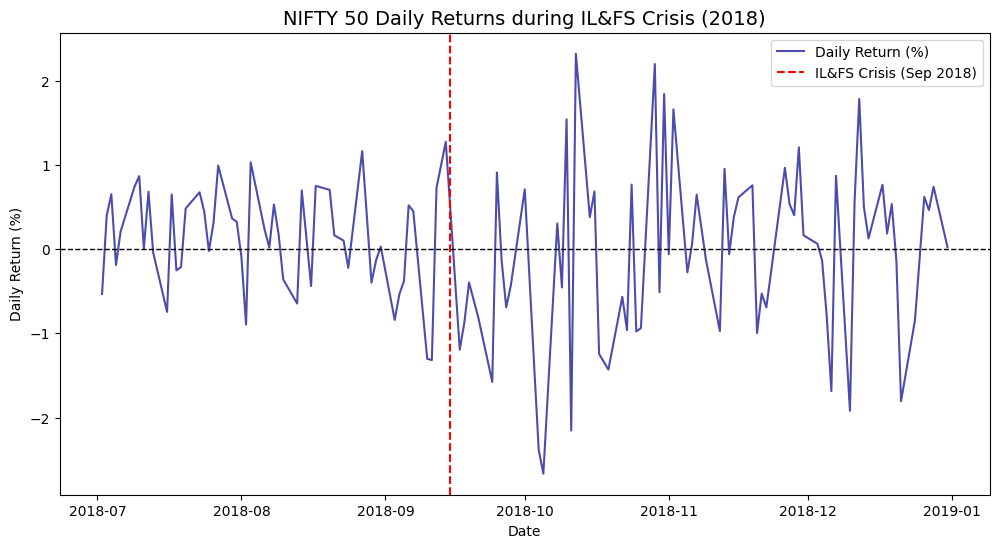

In [29]:
# Daily returns already calculated earlier (df['Daily_Return'])

# Select IL&FS crisis period
ilfs_period = df.loc["2018-07":"2018-12"]

plt.figure(figsize=(12,6))
plt.plot(ilfs_period.index, ilfs_period['Daily_Return'], color="darkblue", alpha=0.7, label="Daily Return (%)")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(pd.to_datetime("2018-09-15"), color="red", linestyle="--", label="IL&FS Crisis (Sep 2018)")
plt.title("NIFTY 50 Daily Returns during IL&FS Crisis (2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

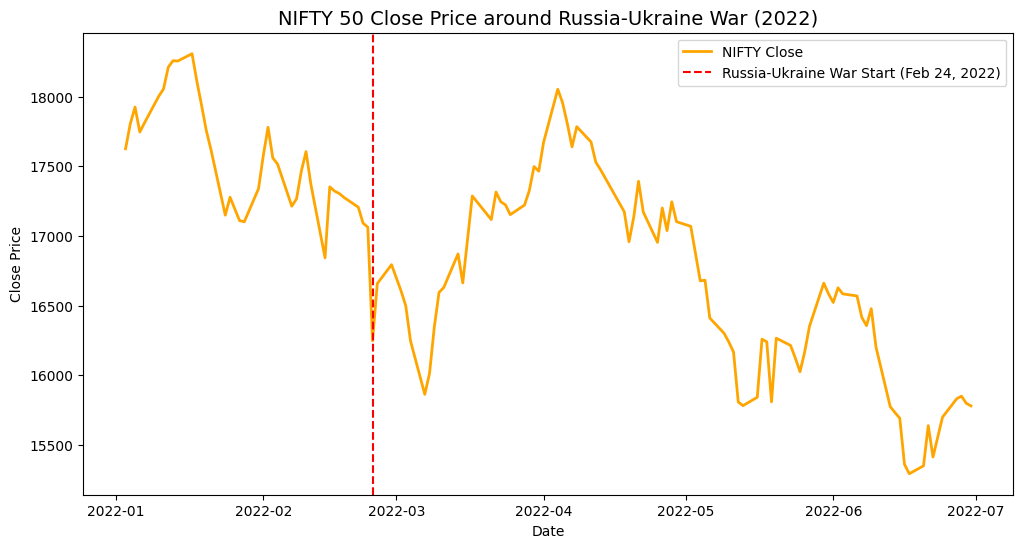

In [30]:
# Select Russia-Ukraine war period
war_period = df.loc["2022-01":"2022-06"]

plt.figure(figsize=(12,6))
plt.plot(war_period.index, war_period['Close'], color="orange", linewidth=2, label="NIFTY Close")
plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Russia-Ukraine War Start (Feb 24, 2022)")
plt.title("NIFTY 50 Close Price around Russia-Ukraine War (2022)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

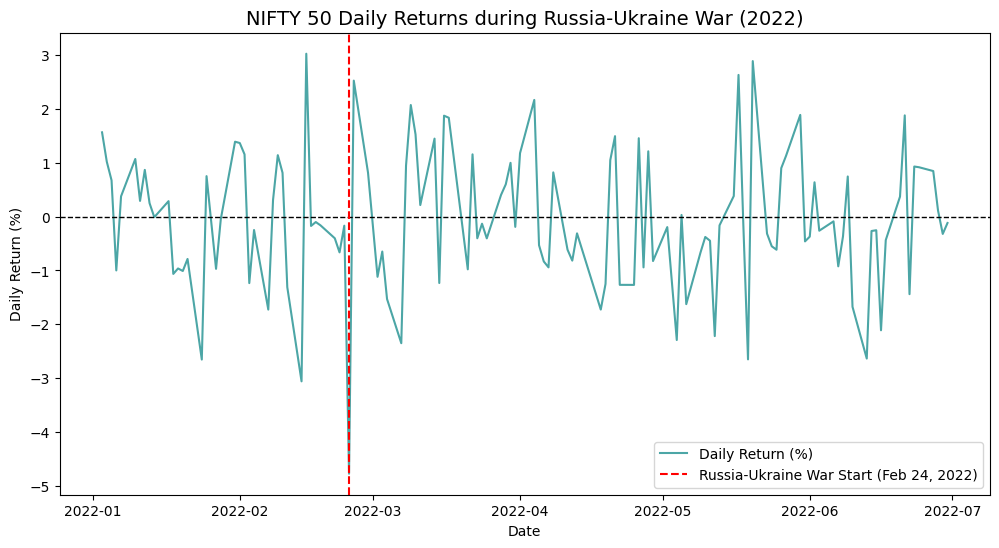

In [31]:
# Daily returns already calculated earlier (df['Daily_Return'])

# Select war period
war_period = df.loc["2022-01":"2022-06"]

plt.figure(figsize=(12,6))
plt.plot(war_period.index, war_period['Daily_Return'], color="teal", alpha=0.7, label="Daily Return (%)")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Russia-Ukraine War Start (Feb 24, 2022)")
plt.title("NIFTY 50 Daily Returns during Russia-Ukraine War (2022)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

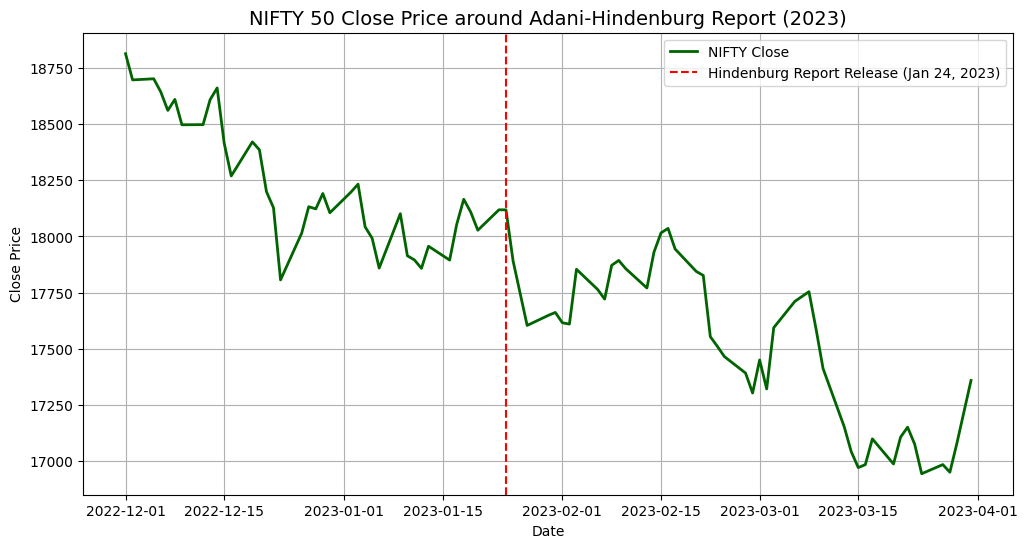

In [32]:
# Select period around Jan 2023
adani_period = df.loc["2022-12":"2023-03"]

plt.figure(figsize=(12,6))
plt.plot(adani_period.index, adani_period['Close'], color="darkgreen", linewidth=2, label="NIFTY Close")
plt.axvline(pd.to_datetime("2023-01-24"), color="red", linestyle="--", label="Hindenburg Report Release (Jan 24, 2023)")
plt.title("NIFTY 50 Close Price around Adani-Hindenburg Report (2023)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


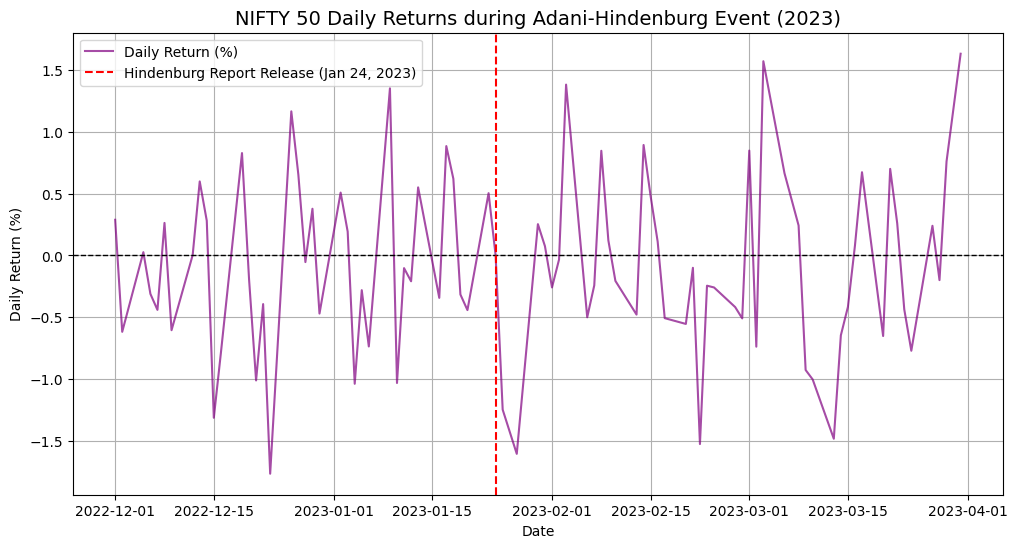

In [33]:
# Daily returns already calculated earlier (df['Daily_Return'])

# Select period around Jan 2023
adani_period = df.loc["2022-12":"2023-03"]

plt.figure(figsize=(12,6))
plt.plot(adani_period.index, adani_period['Daily_Return'], color="purple", alpha=0.7, label="Daily Return (%)")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(pd.to_datetime("2023-01-24"), color="red", linestyle="--", label="Hindenburg Report Release (Jan 24, 2023)")
plt.title("NIFTY 50 Daily Returns during Adani-Hindenburg Event (2023)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.grid(True)
plt.show()


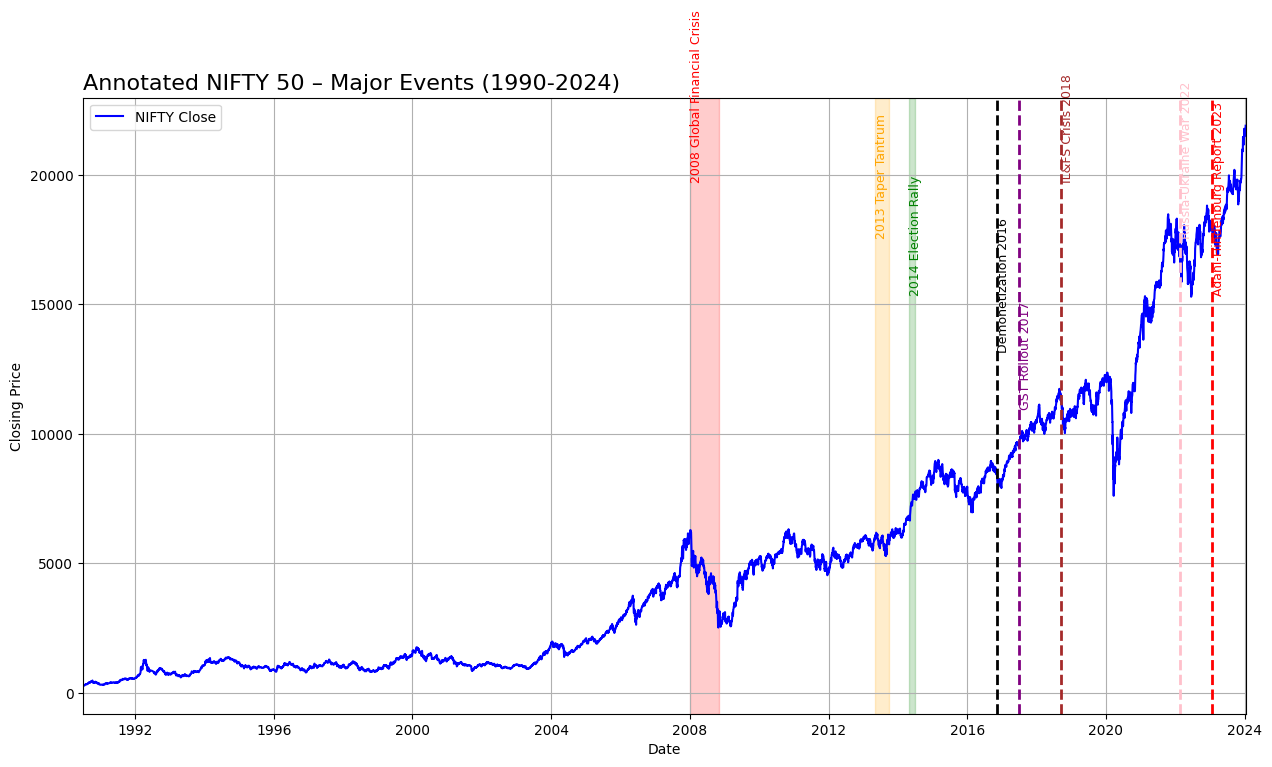

In [34]:
plt.figure(figsize=(15,8))
plt.plot(df.index, df['Close'], color="blue", label="NIFTY Close")

# Annotate major events
events = {
    "2008 Global Financial Crisis": (pd.to_datetime("2008-01-01"), pd.to_datetime("2008-10-31"), "red"),
    "2013 Taper Tantrum": (pd.to_datetime("2013-05-01"), pd.to_datetime("2013-09-30"), "orange"),
    "2014 Election Rally": (pd.to_datetime("2014-05-01"), pd.to_datetime("2014-06-30"), "green"),
    "Demonetization 2016": (pd.to_datetime("2016-11-08"), pd.to_datetime("2016-11-08"), "black"),
    "GST Rollout 2017": (pd.to_datetime("2017-07-01"), pd.to_datetime("2017-07-01"), "purple"),
    "IL&FS Crisis 2018": (pd.to_datetime("2018-09-15"), pd.to_datetime("2018-09-15"), "brown"),
    "Russia-Ukraine War 2022": (pd.to_datetime("2022-02-24"),pd.to_datetime("2022-02-24"), "pink"),
    "Adani-Hindenburg Report 2023": (pd.to_datetime("2023-01-24"), pd.to_datetime("2023-01-24"), "red")
}

# place annotations staggered
y_positions = [0.9, 0.8, 0.7, 0.6, 0.5]  # relative positions
i = 0

for event, (start, end, color) in events.items():
    if start != end:
        plt.axvspan(start, end, color=color, alpha=0.2)
    else:
        plt.axvline(start, color=color, linestyle="--", linewidth=2)

    ypos = df['Close'].max() * y_positions[i % len(y_positions)]
    plt.text(start, ypos, event, rotation=90, fontsize=9, color=color, va='bottom')
    i += 1

plt.title("Annotated NIFTY 50 – Major Events (1990-2024)", fontsize=16, loc='left')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(["NIFTY Close"])
plt.grid(True)
plt.xlim(df.index.min(), df.index.max())
plt.show()


### **Model builing**

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Ensure frequency and fill missing values
df = df.asfreq('B')
df['Close'] = df['Close'].ffill()

def stationary_status(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")

    if result[1] < 0.05:
        print("✅ Data is stationary")
    else:
        print("⚠️ Data is NOT stationary — differencing needed")

# Check original
print("Original Series:")
stationary_status(df['Close'])

# Check first difference
print("\nAfter First Differencing:")
stationary_status(df['Close'].diff())

Original Series:
ADF Statistic: 2.7113
p-value: 0.9991
Critical Value (1%): -3.4311
Critical Value (5%): -2.8619
Critical Value (10%): -2.5669
⚠️ Data is NOT stationary — differencing needed

After First Differencing:
ADF Statistic: -16.5976
p-value: 0.0000
Critical Value (1%): -3.4311
Critical Value (5%): -2.8619
Critical Value (10%): -2.5669
✅ Data is stationary


In [36]:
df.head()

,Open,High,Low,Close,Prev_Open,Prev_High,Prev_Low,Prev_Close,MA20,MA50,Returns,Range,Peak,Drawdown,Daily_Return
Date,,,,,,,,,,,,,,,
1990-07-03,NaN,NaN,NaN,279.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279.02,0.0,NaN
1990-07-04,NaN,NaN,NaN,279.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-07-05,NaN,NaN,NaN,284.04,NaN,NaN,NaN,279.02,NaN,NaN,1.799154,NaN,284.04,0.0,1.799154
1990-07-06,NaN,NaN,NaN,289.04,NaN,NaN,NaN,284.04,NaN,NaN,1.760315,NaN,289.04,0.0,1.760315
1990-07-09,NaN,NaN,NaN,289.69,NaN,NaN,NaN,289.04,NaN,NaN,0.224882,NaN,289.69,0.0,0.224882


In [37]:
#Dropping every column except target column
df = df.drop(['Open', 'High', 'Low', 'Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low','MA20','MA50','Returns','Range','Peak','Drawdown','Daily_Return'], axis=1)

In [38]:
#Taking Sample of last 8 years for model building
df_recent = df[df.index >= df.index.max() - pd.DateOffset(years=8)]

#Filling missing values with forward fill
df_recent = df_recent.fillna(method='ffill')

target_col = 'Close'

#defining y/target variable for testing the models
y = df_recent[[target_col]]

#Define test set date range
test_start_date = '2022-01-13'
test_end_date = '2024-01-12'

#Split data based on the date range
y_train = y.loc[:test_start_date].iloc[:-1] #Exclude the test_start_date from training
y_test = y.loc[test_start_date:test_end_date]


print(f"Shape of training data (y_train): {y_train.shape}")
print(f"Shape of test data (y_test): {y_test.shape}")

Shape of training data (y_train): (1567, 1)
Shape of test data (y_test): (522, 1)


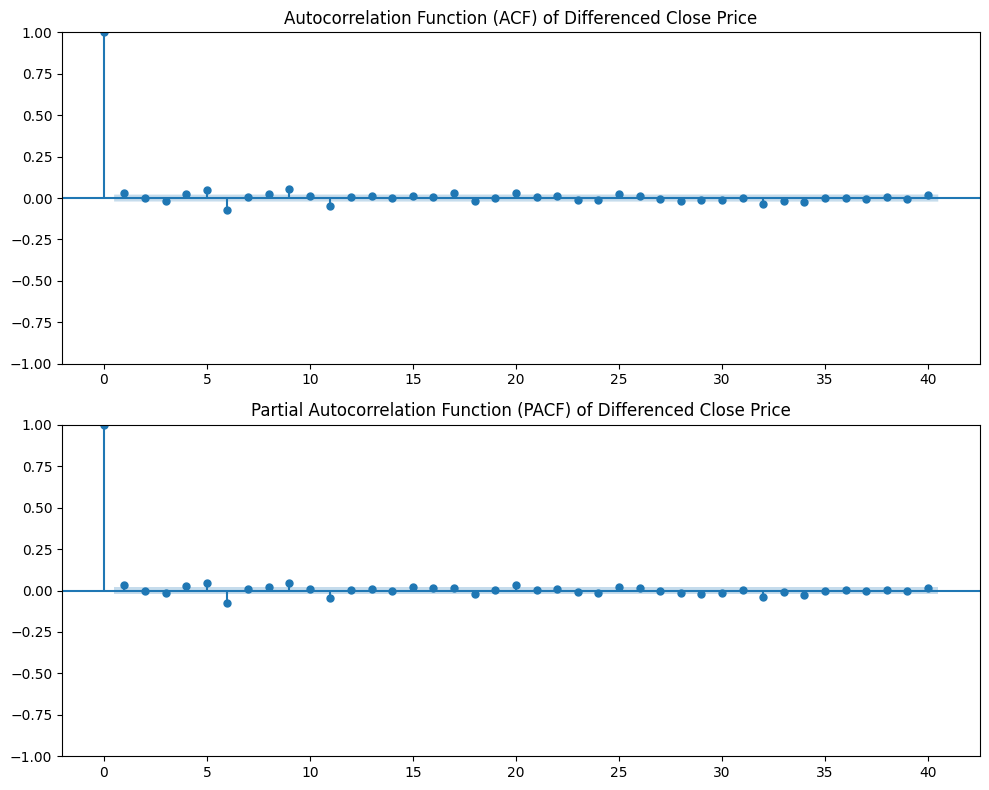

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of the differenced Close price
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df['Close'].diff().dropna(), ax=axes[0], lags=40) # Plot ACF with 40 lags
axes[0].set_title('Autocorrelation Function (ACF) of Differenced Close Price')

plot_pacf(df['Close'].diff().dropna(), ax=axes[1], lags=40) # Plot PACF with 40 lags
axes[1].set_title('Partial Autocorrelation Function (PACF) of Differenced Close Price')

plt.tight_layout()
plt.show()

In [40]:
# Fit the ARIMA model
# Using order (1,1,1) based on ACF and PACF plots of the differenced data.
# The p-value from the ADF test on the differenced data being 0 suggests that differencing once is sufficient (d=1).
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(1,0,1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1567
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9689.568
Date:                Thu, 16 Oct 2025   AIC                          19387.135
Time:                        14:23:59   BIC                          19408.563
Sample:                    01-12-2016   HQIC                         19395.100
                         - 01-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.122e+04   5354.504      2.095      0.036     724.916    2.17e+04
ar.L1          0.9997      0.001    987.753      0.000       0.998       1.002
ma.L1          0.0099      0.015      0.671      0.5

In [41]:
# Make predictions
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Evaluate the model (using MAE,RMSE,R)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae}")
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

MAE: 1326.6212111830507
R-squared: -0.5987720075592244
RMSE: 1722.885147606483


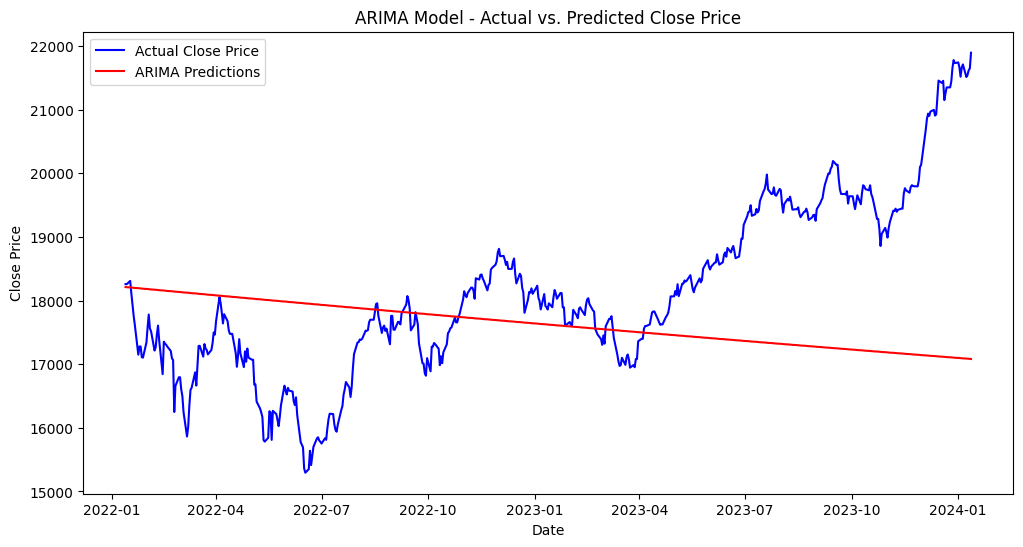

In [42]:
#Plottting the results
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model - Actual vs. Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

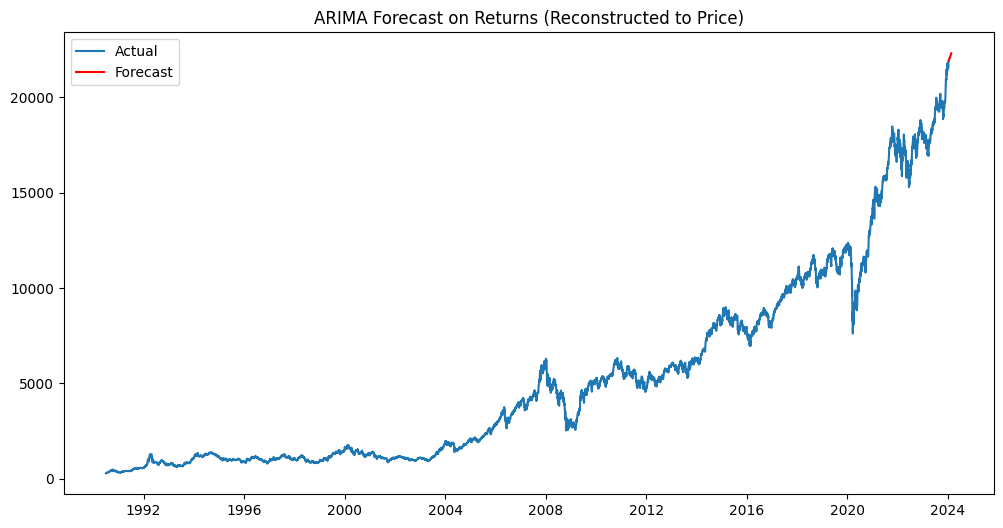

In [43]:
# Calculate returns
df['Return'] = df['Close'].pct_change().dropna()

# Fit ARIMA on returns
import statsmodels.api as sm
model = sm.tsa.ARIMA(df['Return'].dropna(), order=(1,0,1))
model_fit = model.fit()

# Forecast returns
forecast_returns = model_fit.forecast(steps=30)

# Convert back to price
last_price = df['Close'].iloc[-1]
forecast_prices = last_price * np.cumprod(1 + forecast_returns)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Actual")
plt.plot(pd.date_range(start=df.index[-1] + pd.offsets.BDay(1), periods=len(forecast_prices), freq="B"), forecast_prices, color="red", label="Forecast")
plt.title("ARIMA Forecast on Returns (Reconstructed to Price)")
plt.legend()
plt.show()

In [44]:
#Fitting SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(y_train, order=(2,1,2),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity = False,
                enforce_invertibility= False)
results = model.fit(disp =False)
print(results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 1567
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -9616.349
Date:                              Thu, 16 Oct 2025   AIC                          19246.698
Time:                                      14:24:16   BIC                          19284.070
Sample:                                  01-12-2016   HQIC                         19260.602
                                       - 01-12-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8973      0.029    -65.531      0.000      -1.954      -1.841
ar.L2         -0.97

In [45]:
#Making Predictions
pred = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

#Evaluating model performance
s_mae = mean_absolute_error(y_test, pred)
print(f"MAE: {s_mae}")
s_r2 = r2_score(y_test, pred)
print(f"R-squared: {s_r2}")
s_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"RMSE: {s_rmse}")

MAE: 3218.1100724772255
R-squared: -5.1108927118970024
RMSE: 3368.335858602411


In [46]:
!pip uninstall -y pmdarima
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4
!pip install optuna

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)


In [47]:
from pmdarima import auto_arima

# Auto ARIMA to find best params
# Reset index, fill missing values, and set index back to Date
df_reset = df.reset_index()
df_reset['Close'] = df_reset['Close'].fillna(method='ffill')
df_filled = df_reset.set_index('Date')


stepwise_fit = auto_arima(df_filled['Close'], # Use the dataframe with filled values
                          start_p=1, start_q=1,
                          max_p=3, max_q=3,
                          m=5,                    # 5 for weekly seasonality
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=16.44 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=105744.838, Time=2.07 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=103419.682, Time=6.04 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=12.19 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=105716.969, Time=1.76 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=102447.316, Time=8.05 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=10.75 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=8.36 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=102456.257, Time=1.89 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=102447.173, Time=5.35 sec
 ARIMA(2,1,0)(1,1,0)[5]             : AIC=103420.775, Time=5.79 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=13.68 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=inf, Time=9.92 sec
 ARIMA(3,1,0)(2,1,0)[5]             : AIC=102446.569, Time=9.43 sec
 ARIMA(3,1,0)(1,1,0)[5]             : AIC=1

In [48]:
#Fine tuning the Sarima model
best_order = stepwise_fit.order
best_seasonal_order = stepwise_fit.seasonal_order

model = SARIMAX(y_train,
                order=best_order,
                seasonal_order=best_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

In [49]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1567
Model:             SARIMAX(3, 1, 1)x(2, 1, [], 5)   Log Likelihood               -9745.451
Date:                            Thu, 16 Oct 2025   AIC                          19504.902
Time:                                    14:31:43   BIC                          19542.315
Sample:                                01-12-2016   HQIC                         19518.818
                                     - 01-12-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3811      0.305     -1.250      0.211      -0.979       0.216
ar.L2          0.0106      0.017   

In [50]:
#Making Predictions after fine tuning
t_pred = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

#Evaluating model performance
ts_mae = mean_absolute_error(y_test, t_pred)
print(f"MAE: {s_mae}")
ts_r2 = r2_score(y_test, t_pred)
print(f"R-squared: {s_r2}")
ts_rmse = np.sqrt(mean_squared_error(y_test, t_pred))
print(f"RMSE: {s_rmse}")

MAE: 3218.1100724772255
R-squared: -5.1108927118970024
RMSE: 3368.335858602411


In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Test simpler seasonal structure based on auto_arima’s suggestion
test_orders = [
    ((3,1,1), (1,0,1,5)),
    ((3,1,1), (2,0,1,5)),  # remove seasonal differencing
    ((2,1,2), (1,0,1,5)),  # slightly different base model
]

best_model = None
best_rmse = float('inf')

for order, sorder in test_orders:
    model = SARIMAX(y_train, order=order, seasonal_order=sorder,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    pred = results.predict(start=y_test.index[0], end=y_test.index[-1])
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    print(f"Order {order} Seasonal {sorder} -> RMSE: {rmse:.2f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = results

# Evaluate best
print(best_model.summary())


Order (3, 1, 1) Seasonal (1, 0, 1, 5) -> RMSE: 1376.33
Order (3, 1, 1) Seasonal (2, 0, 1, 5) -> RMSE: 1381.76
Order (2, 1, 2) Seasonal (1, 0, 1, 5) -> RMSE: 1382.75
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1567
Model:             SARIMAX(3, 1, 1)x(1, 0, 1, 5)   Log Likelihood               -9618.834
Date:                           Thu, 16 Oct 2025   AIC                          19251.668
Time:                                   14:32:01   BIC                          19289.126
Sample:                               01-12-2016   HQIC                         19265.596
                                    - 01-12-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

MAE: 1121.20, RMSE: 1376.33, R²: -0.0203


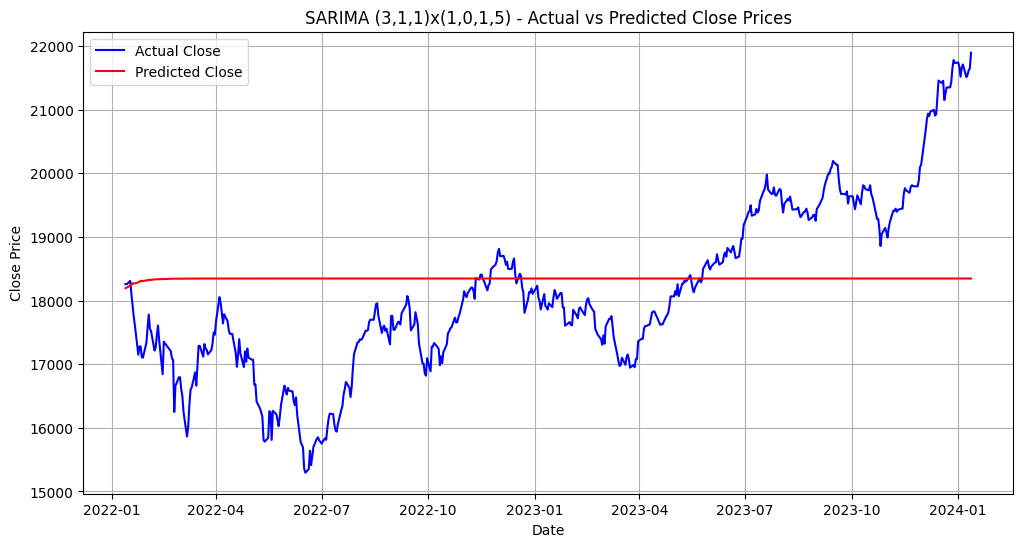

In [52]:
# Predict for test period
t_pred = best_model.predict(start=y_test.index[0], end=y_test.index[-1])

# Evaluate
mae = mean_absolute_error(y_test, t_pred)
rmse = np.sqrt(mean_squared_error(y_test, t_pred))
r2 = r2_score(y_test, t_pred)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, t_pred, label='Predicted Close', color='red')
plt.title('SARIMA (3,1,1)x(1,0,1,5) - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


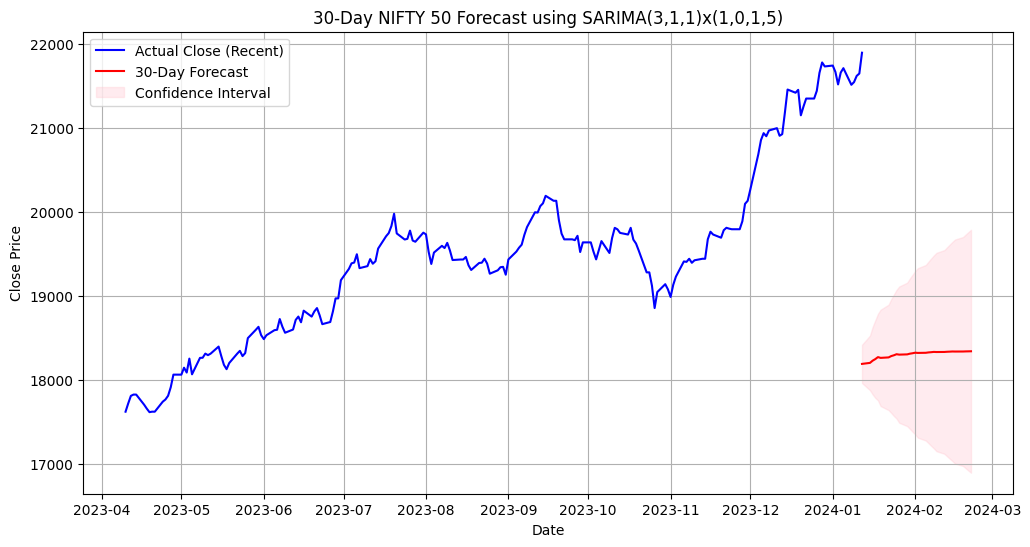

2022-01-13    18192.821545
2022-01-14    18204.824911
2022-01-17    18231.185000
2022-01-18    18249.853624
2022-01-19    18273.555340
2022-01-20    18264.434757
2022-01-21    18269.972423
2022-01-24    18285.792063
2022-01-25    18295.399733
2022-01-26    18307.941672
Freq: B, Name: predicted_mean, dtype: float64


In [53]:
# Forecast next 30 business days
future_forecast = best_model.get_forecast(steps=30)
forecast_index = pd.date_range(start=y_test.index[-1], periods=30, freq='B')
forecast_mean = future_forecast.predicted_mean
conf_int = future_forecast.conf_int()

# Plot actual + forecast
plt.figure(figsize=(12,6))
plt.plot(df.index[-200:], df['Close'][-200:], label='Actual Close (Recent)', color='blue')
plt.plot(forecast_index, forecast_mean, label='30-Day Forecast', color='red')

# Confidence interval shading
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='Confidence Interval'
)

plt.title('30-Day NIFTY 50 Forecast using SARIMA(3,1,1)x(1,0,1,5)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values
print(forecast_mean.head(10))


In [54]:
from prophet import Prophet


# Ensure datetime index
y_train.index = pd.to_datetime(y_train.index)
y_test.index = pd.to_datetime(y_test.index)

# Prepare for Prophet format
train_df = y_train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
test_df = y_test.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

In [55]:
#Initializing and Training Prophet model
model_prophet = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'  # or 'multiplicative' if trend amplitude grows over time
)

model_prophet.fit(train_df) # Use the prepared train_df

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/ui3g1ied.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/8gol83_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38726', 'data', 'file=/tmp/tmpe2yljitn/ui3g1ied.json', 'init=/tmp/tmpe2yljitn/8gol83_n.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model93cy01xs/prophet_model-20251016143205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
#Predict on Test Range and Creating a future dataframe covering on test period
future = pd.DataFrame({'ds': test_df['ds']})

# Forecast
forecast = model_prophet.predict(future)


In [57]:
#Evaluating Model Performance

mae = mean_absolute_error(test_df['y'], forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat']))
r2 = r2_score(test_df['y'], forecast['yhat'])

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 5147.04
RMSE: 5445.38
R²: -14.9709


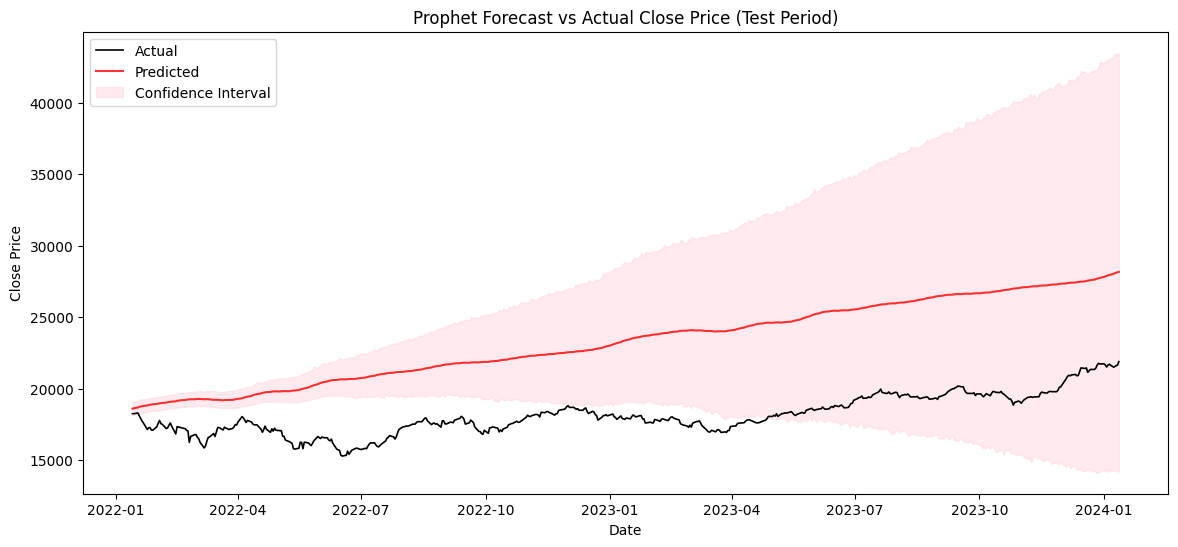

In [58]:
#Visualization of Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='black', linewidth=1.2)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red', alpha=0.8)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Prophet Forecast vs Actual Close Price (Test Period)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [59]:
from prophet import Prophet
from prophet.plot import plot_plotly
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objects as go

# --- 1️⃣ Prepare Prophet data ---
train_prophet = y_train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
test_prophet  = y_test.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# --- 2️⃣ Train Prophet model ---
model_prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)
model_prophet.fit(train_prophet)

# --- 3️⃣ Create future DataFrame (test period + 30 days ahead) ---
n_test_days = len(y_test)
future_periods = n_test_days + 30  # includes test + 30-day forecast
future = model_prophet.make_future_dataframe(periods=future_periods, freq='B')

forecast = model_prophet.predict(future)

# --- 4️⃣ Evaluate on test set only ---
forecast_test = forecast.set_index('ds').loc[y_test.index]
mae = mean_absolute_error(y_test['Close'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(y_test['Close'], forecast_test['yhat']))
print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet RMSE: {rmse:.2f}")

# --- 5️⃣ Plot: Actual vs Predicted + Future Forecast ---
fig = go.Figure()

# Actual (Train)
fig.add_trace(go.Scatter(
    x=train_prophet['ds'], y=train_prophet['y'],
    mode='lines', name='Train Actual', line=dict(color='black', width=1)
))

# Actual (Test)
fig.add_trace(go.Scatter(
    x=test_prophet['ds'], y=test_prophet['y'],
    mode='lines', name='Test Actual', line=dict(color='orange', width=2)
))

# Forecast (Predicted)
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'],
    mode='lines', name='Predicted (Prophet)', line=dict(color='blue', width=2)
))

# Confidence interval (yhat_lower / yhat_upper)
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'],
    mode='lines', line=dict(width=0), showlegend=False
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'],
    mode='lines', fill='tonexty', fillcolor='rgba(173, 216, 230, 0.3)',
    line=dict(width=0), name='Confidence Interval'
))

# --- Highlight 30-Day Future Forecast Region ---
future_start = y_test.index[-1]
fig.add_vrect(
    x0=future_start, x1=forecast['ds'].iloc[-1],
    fillcolor="lightblue", opacity=0.3, line_width=0,
    annotation_text="30-Day Future Forecast", annotation_position="top left"
)

fig.update_layout(
    title="Prophet Forecast vs Actual (Train + Test + 30-Day Future)",
    xaxis_title="Date",
    yaxis_title="Close Price",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

fig.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/cva821qm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/ppayi4zg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67457', 'data', 'file=/tmp/tmpe2yljitn/cva821qm.json', 'init=/tmp/tmpe2yljitn/ppayi4zg.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelnqby9f8k/prophet_model-20251016143210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAE: 5161.78
Prophet RMSE: 5459.90


[I 2025-10-16 14:32:14,325] A new study created in memory with name: no-name-f376945d-21d7-410f-aa74-429a8c8d05ed


🔍 Starting Prophet hyperparameter tuning...



  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/a8zehxnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/i9yye98y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71470', 'data', 'file=/tmp/tmpe2yljitn/a8zehxnq.json', 'init=/tmp/tmpe2yljitn/i9yye98y.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelupi8mqx4/prophet_model-20251016143214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/x6nzsixm.json


[I 2025-10-16 14:32:17,586] Trial 0 finished with value: 1577.4440049510713 and parameters: {'changepoint_prior_scale': 0.0013031122096001677, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/nbgd1z54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72726', 'data', 'file=/tmp/tmpe2yljitn/x6nzsixm.json', 'init=/tmp/tmpe2yljitn/nbgd1z54.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelcydki_r4/prophet_model-20251016143218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/gzexiyfl.json


[I 2025-10-16 14:32:19,653] Trial 1 finished with value: 1836.7998884257604 and parameters: {'changepoint_prior_scale': 0.0019240687399857553, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/8i15mxb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66753', 'data', 'file=/tmp/tmpe2yljitn/gzexiyfl.json', 'init=/tmp/tmpe2yljitn/8i15mxb1.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelm5beivc2/prophet_model-20251016143219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/dqhina20.json


[I 2025-10-16 14:32:20,791] Trial 2 finished with value: 1951.134081489522 and parameters: {'changepoint_prior_scale': 0.000782166732707459, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/4prdpckq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54964', 'data', 'file=/tmp/tmpe2yljitn/dqhina20.json', 'init=/tmp/tmpe2yljitn/4prdpckq.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelcje2_f3v/prophet_model-20251016143221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/btdadbjs.json


[I 2025-10-16 14:32:21,862] Trial 3 finished with value: 1730.8326073063506 and parameters: {'changepoint_prior_scale': 0.0010512141721470533, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/_m2ctlt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16660', 'data', 'file=/tmp/tmpe2yljitn/btdadbjs.json', 'init=/tmp/tmpe2yljitn/_m2ctlt0.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model0eda81ny/prophet_model-20251016143222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/mho7c0pr.json


[I 2025-10-16 14:32:22,817] Trial 4 finished with value: 1804.704210246836 and parameters: {'changepoint_prior_scale': 0.0009007065607388646, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/mtof_633.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50716', 'data', 'file=/tmp/tmpe2yljitn/mho7c0pr.json', 'init=/tmp/tmpe2yljitn/mtof_633.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model6qb7ogel/prophet_model-20251016143223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/ojzntbz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/w2jkae2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

[I 2025-10-16 14:32:23,839] Trial 5 finished with value: 1707.2269987096463 and parameters: {'changepoint_prior_scale': 0.0012017823732055086, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/aq8heq9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/6xezl6v3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51416', 'data', 'file=/tmp/tmpe2yljitn/aq8heq9f.json', 'init=/tmp/tmpe2yljitn/6xezl6v3.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelnk4me9hm/prophet_model-20251016143224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:32:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/hu5avhrw.json


[I 2025-10-16 14:32:24,465] Trial 6 finished with value: 1656.5912697610352 and parameters: {'changepoint_prior_scale': 0.0017731783025341904, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/3pd87dv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67265', 'data', 'file=/tmp/tmpe2yljitn/hu5avhrw.json', 'init=/tmp/tmpe2yljitn/3pd87dv8.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model6k3q6bbs/prophet_model-20251016143224.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/47nhj3xd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/lq4fkepk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.

[I 2025-10-16 14:32:28,658] Trial 7 finished with value: 1884.4066979352185 and parameters: {'changepoint_prior_scale': 0.00031712576960312946, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1577.4440049510713.


14:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/k07noxf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/8pl2ja1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21631', 'data', 'file=/tmp/tmpe2yljitn/k07noxf_.json', 'init=/tmp/tmpe2yljitn/8pl2ja1p.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelhd7e808o/prophet_model-20251016143229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:32:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

[I 2025-10-16 14:32:29,309] Trial 8 finished with value: 1728.1757413794255 and parameters: {'changepoint_prior_scale': 0.0011012165111814103, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 1577.4440049510713.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/8lcd0srk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90530', 'data', 'file=/tmp/tmpe2yljitn/ei7tbreo.json', 'init=/tmp/tmpe2yljitn/8lcd0srk.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model_ztx454u/prophet_model-20251016143229.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/9e0mtetp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/954o4pdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.

[I 2025-10-16 14:32:35,609] Trial 9 finished with value: 1880.4013496742234 and parameters: {'changepoint_prior_scale': 0.0003350829486081256, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1577.4440049510713.


14:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/gqbion9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/wbocxglc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14889', 'data', 'file=/tmp/tmpe2yljitn/gqbion9n.json', 'init=/tmp/tmpe2yljitn/wbocxglc.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelmaqc5r_c/prophet_model-20251016143236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:36,268] Trial 10 finished with value: 1240.3729022029388 and parameters: {'changepoint_prior_scale': 0.0004989055284212501, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 10 with value: 1240.3729022029388.


14:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/cc_3ko0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/6k2qwf6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76724', 'data', 'file=/tmp/tmpe2yljitn/cc_3ko0v.json', 'init=/tmp/tmpe2yljitn/6k2qwf6t.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelrfg6w9pk/prophet_model-20251016143237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:36,964] Trial 11 finished with value: 1850.4277175782374 and parameters: {'changepoint_prior_scale': 0.0005072090867838586, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 10 with value: 1240.3729022029388.


14:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/3cpbkujk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/ow925w40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40573', 'data', 'file=/tmp/tmpe2yljitn/3cpbkujk.json', 'init=/tmp/tmpe2yljitn/ow925w40.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelaykffz1k/prophet_model-20251016143237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:37,603] Trial 12 finished with value: 1868.7164126107878 and parameters: {'changepoint_prior_scale': 0.0005548396562900498, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 10 with value: 1240.3729022029388.


14:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/k8yrmoyc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/45yfngsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21663', 'data', 'file=/tmp/tmpe2yljitn/k8yrmoyc.json', 'init=/tmp/tmpe2yljitn/45yfngsm.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modeli97xja_e/prophet_model-20251016143238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2025-10-16 14:32:38,241] Trial 13 finished with value: 1929.714161271424 and parameters: {'changepoint_prior_scale': 0.0005533429638810837, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 10 with value: 1240.3729022029388.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/qlcbq978.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/jpy0y25e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55066', 'data', 'file=/tmp/tmpe2yljitn/qlcbq978.json', 'init=/tmp/tmpe2yljitn/jpy0y25e.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelvxs0b51z/prophet_model-20251016143238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:38,871] Trial 14 finished with value: 1292.920263836569 and parameters: {'changepoint_prior_scale': 0.0014507865919697106, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 10 with value: 1240.3729022029388.


14:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/3ra3usk3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/mwjoaijt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4335', 'data', 'file=/tmp/tmpe2yljitn/3ra3usk3.json', 'init=/tmp/tmpe2yljitn/mwjoaijt.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model1e_gmvmi/prophet_model-20251016143239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:39,511] Trial 15 finished with value: 1310.4612571508178 and parameters: {'changepoint_prior_scale': 0.0004744077600645833, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 10 with value: 1240.3729022029388.


14:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/p8wgh65w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/c788capn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83332', 'data', 'file=/tmp/tmpe2yljitn/p8wgh65w.json', 'init=/tmp/tmpe2yljitn/c788capn.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelmfv_atvw/prophet_model-20251016143240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2025-10-16 14:32:40,176] Trial 16 finished with value: 937.6521367712602 and parameters: {'changepoint_prior_scale': 0.0014827546173315806, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 16 with value: 937.6521367712602.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/53_o7ved.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/rvfv7ss4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77692', 'data', 'file=/tmp/tmpe2yljitn/53_o7ved.json', 'init=/tmp/tmpe2yljitn/rvfv7ss4.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelfum9k7j4/prophet_model-20251016143240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:40,795] Trial 17 finished with value: 1836.198750448586 and parameters: {'changepoint_prior_scale': 0.0006482163718248843, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}. Best is trial 16 with value: 937.6521367712602.


14:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/b5tcdlyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/4hf_7ijg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83039', 'data', 'file=/tmp/tmpe2yljitn/b5tcdlyv.json', 'init=/tmp/tmpe2yljitn/4hf_7ijg.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model16uuyn7m/prophet_model-20251016143241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:41,450] Trial 18 finished with value: 1030.9438401892126 and parameters: {'changepoint_prior_scale': 0.0004027395722649267, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.


14:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/vi98lqnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/ju774djz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43879', 'data', 'file=/tmp/tmpe2yljitn/vi98lqnw.json', 'init=/tmp/tmpe2yljitn/ju774djz.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelp1w2mqgu/prophet_model-20251016143242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2025-10-16 14:32:42,116] Trial 19 finished with value: 1274.0793180109638 and parameters: {'changepoint_prior_scale': 0.00041523362231406686, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/sf_0l_o5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/6qa_xo0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92981', 'data', 'file=/tmp/tmpe2yljitn/sf_0l_o5.json', 'init=/tmp/tmpe2yljitn/6qa_xo0v.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelkct0x5z6/prophet_model-20251016143242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:42,737] Trial 20 finished with value: 1867.7729998527325 and parameters: {'changepoint_prior_scale': 0.0006792466694013555, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.


14:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/gm2p_na6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/s2pmjpxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64881', 'data', 'file=/tmp/tmpe2yljitn/gm2p_na6.json', 'init=/tmp/tmpe2yljitn/s2pmjpxm.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model1okvv3hk/prophet_model-20251016143243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:43 - cmdstanpy - INFO - Chain [1] start processing


[I 2025-10-16 14:32:43,390] Trial 21 finished with value: 1169.9184030847828 and parameters: {'changepoint_prior_scale': 0.0003815473849943987, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.


INFO:cmdstanpy:Chain [1] start processing
14:32:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/tgtq_95o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/siz561ub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92613', 'data', 'file=/tmp/tmpe2yljitn/tgtq_95o.json', 'init=/tmp/tmpe2yljitn/siz561ub.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelha3rhw26/prophet_model-20251016143244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2025-10-16 14:32:44,318] Trial 22 finished with value: 1261.557027053643 and parameters: {'changepoint_prior_scale': 0.00039568605997371, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.


14:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:32:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/mt_blubs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/rolo4jh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66710', 'data', 'file=/tmp/tmpe2yljitn/mt_blubs.json', 'init=/tmp/tmpe2yljitn/rolo4jh2.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelkr9y06ht/prophet_model-20251016143244.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

[I 2025-10-16 14:32:49,863] Trial 23 finished with value: 1889.7247567767802 and parameters: {'changepoint_prior_scale': 0.0003721271348670837, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/jsyt4vm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61825', 'data', 'file=/tmp/tmpe2yljitn/y0ihruuc.json', 'init=/tmp/tmpe2yljitn/jsyt4vm2.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_model2phvewjd/prophet_model-20251016143250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/nim256z8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/dahvt14t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.

[I 2025-10-16 14:32:55,660] Trial 24 finished with value: 1888.2679907878291 and parameters: {'changepoint_prior_scale': 0.00030130432219609463, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}. Best is trial 16 with value: 937.6521367712602.

✅ Best Parameters Found:
{'changepoint_prior_scale': 0.0014827546173315806, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


14:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2019-01-23 00:00:00 and 2021-01-12 00:00:00



📊 Evaluation Metrics on Test Set:
RMSE: 937.65
MAE: 738.66
R²: 0.526

📆 Performing Prophet Cross-Validation...


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/12tdnbel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/zepczxkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93568', 'data', 'file=/tmp/tmpe2yljitn/12tdnbel.json', 'init=/tmp/tmpe2yljitn/zepczxkc.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelf53jdfrf/prophet_model-20251016143256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/1i6833c8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/rrznocmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


📊 Prophet Cross-Validation Summary:
  horizon         rmse         mae      mape  coverage
0 37 days  1288.908662  957.626153  0.075246  0.478846
1 38 days  1306.272786  968.127374  0.075950  0.480769
2 39 days  1298.580284  960.016450  0.075505  0.489744
3 40 days  1288.954692  947.033256  0.074549  0.502564
4 41 days  1306.923835  959.790473  0.075241  0.497436


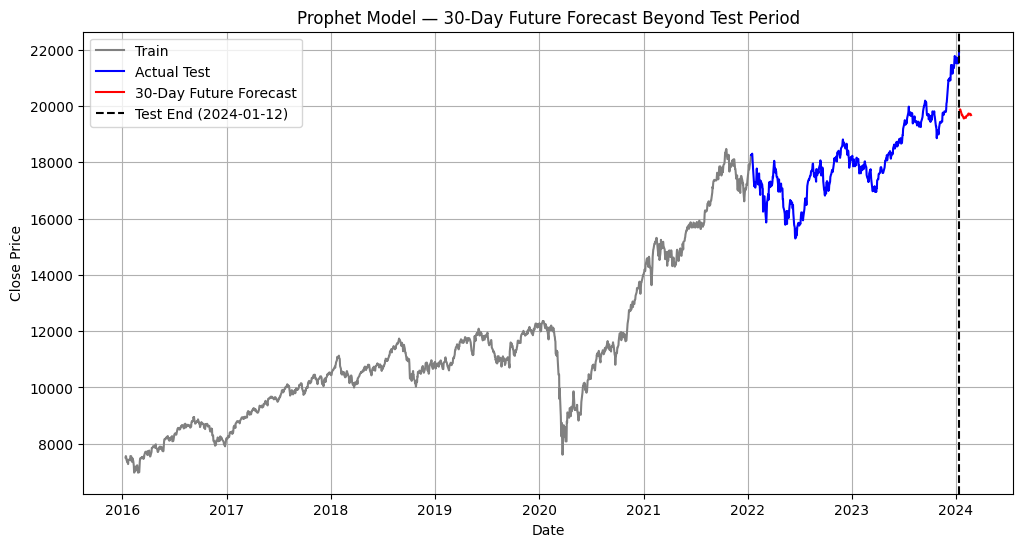

In [60]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

# ===============================
# 1️⃣ Prepare Data
# ===============================
train_prophet = y_train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
test_prophet = y_test.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# ===============================
# 2️⃣ Define Objective Function for Optuna
# ===============================
def objective(trial):
    params = {
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.0003, 0.002, log=True),
        'seasonality_prior_scale': trial.suggest_categorical('seasonality_prior_scale', [0.1, 1.0, 5.0, 10.0]),
        'seasonality_mode': trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative']),
    }

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        **params
    )
    model.fit(train_prophet)

    # Forecast on test range
    future = model.make_future_dataframe(periods=len(y_test), freq='B')
    forecast = model.predict(future)
    forecast_test = forecast.set_index('ds').loc[y_test.index]

    rmse = np.sqrt(mean_squared_error(y_test['Close'], forecast_test['yhat']))
    return rmse

# ===============================
# 3️⃣ Run Bayesian Optimization
# ===============================
print("🔍 Starting Prophet hyperparameter tuning...\n")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25, show_progress_bar=True)

best_params = study.best_params
print("\n✅ Best Parameters Found:")
print(best_params)

# ===============================
# 4️⃣ Train Final Prophet Model
# ===============================
best_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    **best_params
)
best_model.fit(train_prophet)

# ===============================
# 5️⃣ Evaluate on Test Set
# ===============================
future_test = best_model.make_future_dataframe(periods=len(y_test), freq='B')
forecast_test = best_model.predict(future_test)
forecast_test = forecast_test.set_index('ds').loc[y_test.index]

rmse = np.sqrt(mean_squared_error(y_test['Close'], forecast_test['yhat']))
mae = mean_absolute_error(y_test['Close'], forecast_test['yhat'])
r2 = r2_score(y_test['Close'], forecast_test['yhat'])

print(f"\n📊 Evaluation Metrics on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

# ===============================
# 6️⃣ Prophet Cross-Validation
# ===============================
print("\n📆 Performing Prophet Cross-Validation...")
df_cv = cross_validation(best_model, initial='1095 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print("\n📊 Prophet Cross-Validation Summary:")
print(df_p[['horizon', 'rmse', 'mae', 'mape', 'coverage']].head())

# ===============================
# 7️⃣ Plot Actual vs Forecast + 30D Future (Future Only)
# ===============================
last_date = y_test.index.max()

# Create forecast that extends 30 business days *after* the last test date
future_30d = best_model.make_future_dataframe(periods=len(y_test) + 30, freq='B')
forecast_full = best_model.predict(future_30d)

# Only future beyond test period
forecast_future_only = forecast_full[forecast_full['ds'] > last_date]

plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train['Close'], label='Train', color='gray')
plt.plot(y_test.index, y_test['Close'], label='Actual Test', color='blue')
plt.plot(forecast_future_only['ds'], forecast_future_only['yhat'],
         label='30-Day Future Forecast', color='red')

plt.axvline(last_date, color='black', linestyle='--', label=f'Test End ({last_date.date()})')
plt.title('Prophet Model — 30-Day Future Forecast Beyond Test Period')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()



In [61]:
# ✅ Final Prophet Model (Train/Test + 30-Day Future Forecast)
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ======================================
# 1️⃣ Prepare Data
# ======================================
train_prophet = y_train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
test_prophet = y_test.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# ======================================
# 2️⃣ Best Parameters from Optuna
# ======================================
best_params = {
    'changepoint_prior_scale': 0.0015641257499126255,
    'seasonality_prior_scale': 10.0,
    'seasonality_mode': 'additive'
}

# ======================================
# 3️⃣ Train Model on Train Set
# ======================================
best_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    **best_params
)
best_model.fit(train_prophet)

# ======================================
# 4️⃣ Predict on Test Period
# ======================================
future_test = best_model.make_future_dataframe(periods=len(y_test), freq='B')
forecast_test = best_model.predict(future_test)

# Align forecast with test index
forecast_test = forecast_test.set_index('ds').loc[y_test.index]

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test['Close'], forecast_test['yhat']))
mae = mean_absolute_error(y_test['Close'], forecast_test['yhat'])
r2 = r2_score(y_test['Close'], forecast_test['yhat'])

print(f"\n📊 Evaluation Metrics on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")



# ======================================
# 5️⃣ Forecast Next 30 Business Days (Beyond Test End)
# ======================================
last_date = y_test.index.max()

future_30d = pd.DataFrame({
    'ds': pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=30)
})
forecast_future = best_model.predict(future_30d)
forecast_future = forecast_future.set_index('ds')

# ======================================
# 6️⃣ Interactive Plot — Train, Test, and 30-Day Forecast
# ======================================
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Train Actual
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train['Close'],
    mode='lines', name='Train Actual', line=dict(color='gray')
))

# Test Actual
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test['Close'],
    mode='lines', name='Test Actual', line=dict(color='blue')
))

# Test Predicted
fig.add_trace(go.Scatter(
    x=forecast_test.index, y=forecast_test['yhat'],
    mode='lines', name='Test Predicted', line=dict(color='red')
))

# 30-Day Forecast
fig.add_trace(go.Scatter(
    x=forecast_future.index, y=forecast_future['yhat'],
    mode='lines', name='30-Day Forecast', line=dict(color='orange')
))

# Shaded region for forecast period
fig.add_vrect(
    x0=last_date, x1=forecast_future.index.max(),
    fillcolor="orange", opacity=0.1, line_width=0,
    annotation_text="30-Day Forecast", annotation_position="top left"
)

# Add vertical line for test end using add_shape
fig.add_shape(
    type="line",
    x0=last_date,
    y0=y_train['Close'].min(), # Start y at minimum of train data
    x1=last_date,
    y1=y_test['Close'].max(), # End y at maximum of test data
    line=dict(color="black", dash="dash", width=2),
    xref='x',
    yref='y',
    name=f"Test End ({last_date.date()})",
    # Add annotation separately if needed, as add_shape doesn't have annotation_text
)


# Layout
fig.update_layout(
    title="📈 Prophet — Train, Test, and 30-Day Future Forecast (Interactive)",
    xaxis_title="Date",
    yaxis_title="Close Price",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    hovermode="x unified",
    template="plotly_white"
)

fig.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/cprknjsn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2yljitn/3692c2dz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89163', 'data', 'file=/tmp/tmpe2yljitn/cprknjsn.json', 'init=/tmp/tmpe2yljitn/3692c2dz.json', 'output', 'file=/tmp/tmpe2yljitn/prophet_modelm0q2synh/prophet_model-20251016143259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Evaluation Metrics on Test Set:
RMSE: 717.97
MAE : 546.24
R²  : 0.722


In [63]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import itertools, random, os

# Reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ===============================
#   Helper functions
# ===============================
def create_sequences(values, lookback):
    X, y = [], []
    for i in range(lookback, len(values)):
        X.append(values[i - lookback:i])
        y.append(values[i])
    X = np.array(X).reshape(-1, lookback, 1)
    y = np.array(y)
    return X, y

def build_lstm(lookback, units=64, layers=1, dropout=0.2, lr=0.001):
    model = Sequential()
    for i in range(layers):
        return_seq = (i < layers - 1)
        if i == 0:
            model.add(LSTM(units, return_sequences=return_seq, input_shape=(lookback, 1)))
        else:
            model.add(LSTM(units, return_sequences=return_seq))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    return model

# ===============================
#   Data preparation
# ===============================
train = y_train['Close'].copy()
test = y_test['Close'].copy()
train.index, test.index = pd.to_datetime(train.index), pd.to_datetime(test.index)

scaler = MinMaxScaler((0, 1))
train_scaled = scaler.fit_transform(train.values.reshape(-1,1)).flatten()
test_scaled = scaler.transform(test.values.reshape(-1,1)).flatten()
combined = pd.concat([train, test])
combined_scaled = scaler.transform(combined.values.reshape(-1,1)).flatten()

# ===============================
#   Manual hyperparameter tuning
# ===============================
param_grid = {
    "lookback": [45],
    "units": [64, 128],
    "layers": [1],
    "dropout": [0.2],
    "lr": [0.001],
    "batch_size": [16]
}

best_rmse, best_params = float("inf"), None

for params in itertools.product(*param_grid.values()):
    p = dict(zip(param_grid.keys(), params))
    lookback = p['lookback']

    X, y_seq = create_sequences(train_scaled, lookback)
    n_val = int(len(X) * 0.1)
    X_tr, X_val = X[:-n_val], X[-n_val:]
    y_tr, y_val = y_seq[:-n_val], y_seq[-n_val:]

    model = build_lstm(lookback, p['units'], p['layers'], p['dropout'], p['lr'])
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=100, batch_size=p['batch_size'], verbose=0, callbacks=[es])

    val_pred = model.predict(X_val).flatten()
    rmse = np.sqrt(mean_squared_error(y_val, val_pred))

    if rmse < best_rmse:
        best_rmse, best_params = rmse, p

print(f"✅ Best Params: {best_params}")
print(f"Validation RMSE: {best_rmse:.4f}")

# ===============================
#   Train final model on full train set
# ===============================
lookback = best_params['lookback']
X_train, y_train_seq = create_sequences(train_scaled, lookback)

model = build_lstm(lookback, best_params['units'], best_params['layers'], best_params['dropout'], best_params['lr'])
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
model.fit(X_train, y_train_seq, epochs=50, batch_size=best_params['batch_size'], validation_split=0.05, callbacks=[es], verbose=1)

# ===============================
#   Predict on test set
# ===============================
combined_idx = combined.index
X_combined, y_combined = create_sequences(combined_scaled, lookback)
target_pos = np.arange(lookback, len(combined_scaled))
target_dates = combined_idx[target_pos]

is_test = target_dates.isin(test.index)
X_test = X_combined[is_test]
y_test_scaled = y_combined[is_test]

y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

# Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("\n📊 Test Performance:")
print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.3f}")

# ===============================
#   30 Business-day Forecast
# ===============================
last_date = test.index[-1]
future_dates = pd.bdate_range(last_date + pd.Timedelta(days=1), periods=30)
window = combined_scaled[-lookback:].tolist()
future_scaled_preds = []

for _ in range(len(future_dates)):
    x = np.array(window).reshape(1, lookback, 1)
    pred = model.predict(x).flatten()[0]
    future_scaled_preds.append(pred)
    window.append(pred)
    window.pop(0)

future_preds = scaler.inverse_transform(np.array(future_scaled_preds).reshape(-1,1)).flatten()
future_series = pd.Series(future_preds, index=future_dates)

# ===============================
#   Interactive Plot
# ===============================
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Train Actual', line=dict(color='gray')))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Test Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test.index, y=y_pred, mode='lines+markers', name='Test Predicted', line=dict(color='red')))
fig.add_trace(go.Scatter(x=future_series.index, y=future_series, mode='lines+markers', name='30-Day Forecast', line=dict(color='orange')))
# Vertical line at test end
fig.add_shape(
    type="line",
    x0=last_date,
    x1=last_date,
    y0=min(train.min(), test.min()),
    y1=max(train.max(), test.max()),
    line=dict(color="black", dash="dash")
)

# Annotation
fig.add_annotation(
    x=last_date,
    y=test.max(),
    text="Test End",
    showarrow=False,
    yshift=10,
    font=dict(color="black")
)

fig.update_layout(title="LSTM (Tuned Manually) — Train, Test & 30-Day Forecast",
                  xaxis_title="Date", yaxis_title="Close Price",
                  template="plotly_white", legend=dict(x=0.01, y=0.99))
fig.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
✅ Best Params: {'lookback': 45, 'units': 64, 'layers': 1, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 16}
Validation RMSE: 0.0128
Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0288 - val_loss: 0.0044
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019 - val_loss: 8.0259e-04
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0015 - val_loss: 7.0139e-04
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011 - val_loss: 7.9741e-04
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0010 - val_loss: 6.3654e-04
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 9.5643e-04 - val_loss: 6.6054e-04
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010 - val_loss: 6.4791e-04
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2